In [72]:
#!/usr/bin/env python3

import json
import os
import random
import time
import pickle

import learn2learn as l2l
import numpy as np
import torch
import tqdm
from torch import nn, optim

import sys
sys.path.append("..")

from models import CNN4
from utils.args_parser import get_args
import matplotlib
import matplotlib.pyplot as plt
import utils.pwcca
import cca_core

subplot_fontsize = 16
plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.15)
ber = dict()


ber["targ_awgn"] = dict()
ber["targ_bursty"] = dict()
ber["targ_mem"] = dict()
ber["targ_mp"] = dict()

ber["cross_targ_awgn"] = dict()
ber["cross_targ_bursty"] = dict()
ber["cross_targ_mem"] = dict()
ber["cross_targ_mp"] = dict()

ber2real = dict()
ber2real["targ_real"] = dict()

<Figure size 1980x1500 with 0 Axes>

In [78]:

ber["targ_awgn"]["MAML"]	 = 	[	0.017413	,	0.012693	,	0.021813	]
ber["targ_awgn"]["ANIL"]	 = 	[	0.024773	,	0.02456	,	0.028587	]
ber["targ_awgn"]["ERM"]	 = 	[	0.147467	,	0.1616	,	0.178347	]
ber["targ_awgn"]["Reptile"]	 = 	[	0.06976	,	0.0664	,	0.079813	]
ber["targ_awgn"]["MAMLFO"]	 = 	[	0.01832	,	0.0192	,	0.024853	]
ber["targ_awgn"]["KFO"]	 = 	[	0.019013	,	0.020747	,	0.0248	]
ber["targ_awgn"]["MetaSGD"]	 = 	[	0.00888	,	0.0092	,	0.010933	]
ber["targ_awgn"]["MetaCur."]	 = [	0.007653	,	0.00792	,	0.009307	]
ber["targ_awgn"]["CAVIA"]=	 	[	0.025013	,	0.019547	,	0.020773	]
ber["targ_awgn"]["ProtoNets"]	 = 	[	0.0208	,	0.023227	,	0.0284	]
ber["targ_awgn"]["MetaBas."]	 = 	[	0.02128	,	0.023147	,	0.028187	]
ber["targ_awgn"]["FEAT"]	 = 	[	0.021733	,	0.0248	,	0.02928	]
ber["targ_awgn"]["BOIL"]	 = 	[	0.078107	,	0.029413	,	0.027867	]	

# bursty_hard	 = 	[	focused	,	expanded	,	mixed	]
ber["targ_bursty"]["MAML"]	 = 	[	0.014027	,	0.016773	,	0.03912	]
ber["targ_bursty"]["ANIL"]	 = 	[	0.023653	,	0.023813	,	0.033253	]
ber["targ_bursty"]["ERM"]	 = 	[	0.164133	,	0.164987	,	0.253973	]
ber["targ_bursty"]["Reptile"]	 = 	[	0.098107	,	0.09744	,	0.169013	]
ber["targ_bursty"]["MAMLFO"]	 = 	[	0.017333	,	0.018907	,	0.033147	]
ber["targ_bursty"]["KFO"]	 = 	[	0.022693	,	0.019547	,	0.028453	]
ber["targ_bursty"]["MetaSGD"]	 = 	[	0.00904	,	0.008773	,	0.013547	]
ber["targ_bursty"]["MetaCur."]	 = 	[	0.008533	,	0.007813	,	0.0128	]
ber["targ_bursty"]["CAVIA"]	 = 	[	0.014773	,	0.022347	,	0.036	]
ber["targ_bursty"]["ProtoNets"]	 = 	[	0.022187	,	0.02288	,	0.032133	]
ber["targ_bursty"]["MetaBas."]	 = 	[	0.021413	,	0.022987	,	0.043893	]
ber["targ_bursty"]["FEAT"]	 = 	[	0.023013	,	0.023573	,	0.043733	]
ber["targ_bursty"]["BOIL"]	 = 	[	0.061307	,	0.046987	,	0.044613	]	

# mem_hard	 = 	[	focused	,	expanded	,	mixed	]	
ber["targ_mem"]["MAML"]	 = 	[	0.007947	,	0.005307	,	0.009467	]
ber["targ_mem"]["ANIL"]	 = 	[	0.007947	,	0.01024	,	0.014133	]
ber["targ_mem"]["ERM"]	 = 	[	0.102587	,	0.11848	,	0.144107	]
ber["targ_mem"]["Reptile"]	 = 	[	0.042853	,	0.047093	,	0.05896	]
ber["targ_mem"]["MAMLFO"]	 = 	[	0.008373	,	0.006907	,	0.011093	]
ber["targ_mem"]["KFO"]	 = 	[	0.008773	,	0.0084	,	0.01256	]
ber["targ_mem"]["MetaSGD"]	 = 	[	0.004107	,	0.002667	,	0.004293	]
ber["targ_mem"]["MetaCur."]	 = 	[	0.00232	,	0.002	,	0.003387	]
ber["targ_mem"]["CAVIA"]	 = 	[	0.01592	,	0.009573	,	0.0084	]
ber["targ_mem"]["ProtoNets"]	 = 	[	0.00728	,	0.008747	,	0.014027	]
ber["targ_mem"]["MetaBas."]	 = 	[	0.007413	,	0.00872	,	0.014613	]
ber["targ_mem"]["FEAT"]	 = 	[	0.007253	,	0.00992	,	0.01656	]
ber["targ_mem"]["BOIL"]	 = 	[	0.019547	,	0.012853	,	0.011653	]	
# mp_hard	 = 	[	focused	,	expanded	,	mixed	]	

ber["targ_mp"]["MAML"]	 = 	[	0.016747	,	0.015387	,	0.029227	]
ber["targ_mp"]["ANIL"]	 = 	[	0.026667	,	0.02848	,	0.032827	]
ber["targ_mp"]["ERM"]	 = 	[	0.157147	,	0.182613	,	0.190853	]
ber["targ_mp"]["Reptile"]	 = 	[	0.07144	,	0.075147	,	0.089387	]
ber["targ_mp"]["MAMLFO"]	 = 	[	0.021707	,	0.023813	,	0.03104	]
ber["targ_mp"]["KFO"]	 = 	[	0.023627	,	0.02504	,	0.027413	]
ber["targ_mp"]["MetaSGD"]	 = 	[	0.012667	,	0.010987	,	0.01344	]
ber["targ_mp"]["MetaCur."]	 = 	[	0.010133	,	0.01064	,	0.012773	]
ber["targ_mp"]["CAVIA"]	 = 	[	0.02376	,	0.02504	,	0.024453	]
ber["targ_mp"]["ProtoNets"]	 = 	[	0.025973	,	0.02968	,	0.034347	]
ber["targ_mp"]["MetaBas."]	 = 	[	0.024533	,	0.02784	,	0.033013	]
ber["targ_mp"]["FEAT"]	 = 	[	0.02704	,	0.02816	,	0.035547	]
ber["targ_mp"]["BOIL"]	 = 	[	0.08	,	0.026187	,	0.0344	]

ber2real["targ_real"]["MAML"]	 = [	0.019941	,	0.038649	,	0.02314	,	0.021207	]

ber2real["targ_real"]["ANIL"]	 = [	0.0203	,	0.049625	,	0.026765	,	0.020567	]

ber2real["targ_real"]["ERM"]	 = [	0.359233	,	0.406228	,	0.380022	,	0.349622	]

ber2real["targ_real"]["Reptile"]	 = [	0.15923	,	0.12982	,	0.166913	,	0.097363	]

ber2real["targ_real"]["MAMLFO"]	 = [	0.01692	,	0.041267	,	0.022179	,	0.017722	]

ber2real["targ_real"]["MetaSGD"]	 = [	0.017151	,	0.036735	,	0.018395	,	0.01673	]

ber2real["targ_real"]["MetaCur."]	 = [	0.014553	,	0.033923	,	0.018259	,	0.014625	]

ber2real["targ_real"]["CAVIA"]	 = [	0.030389	,	0.033421	,	0.031211	,	0.029971	]

ber2real["targ_real"]["KFO"]	 = [	0.018034	,	0.041068	,	0.022723	,	0.01856	]

ber2real["targ_real"]["ProtoNets"]	 = [	0.026647	,	0.063981	,	0.034308	,	0.027155	]

ber2real["targ_real"]["MetaBas."]	 = [	0.027121	,	0.064692	,	0.034697	,	0.028018	]

ber2real["targ_real"]["FEAT"]	 = [	0.028393	,	0.060689	,	0.035769	,	0.028525	]

ber2real["targ_real"]["BOIL"]	 = [	0.026804	,	0.052359	,	0.039914	,	0.025663	]

ber["cross_targ_awgn"]["MAML"]	 = 		[0.012693,		0.071707,		0.028,		0.014533]
ber["cross_targ_awgn"]["ANIL"]	 = 		[0.02456,		0.086613,		0.03296,		0.023227]
ber["cross_targ_awgn"]["ERM"]	 = 		[0.1616,		0.25752,		0.1984,		0.175467]
ber["cross_targ_awgn"]["Reptile"]	 = 		[0.0664,		0.103387,		0.084987,		0.0708]
ber["cross_targ_awgn"]["MAMLFO"]	 = 		[0.0192,		0.0784,		0.027707,		0.020347]
ber["cross_targ_awgn"]["KFO"]	 = 		[0.020747,		0.076053,		0.03056,		0.021787]
ber["cross_targ_awgn"]["MetaSGD"]	 = 		[0.0092,		0.046133,		0.013013,		0.009413]
ber["cross_targ_awgn"]["MetaCur."]	 = 	[	0.00792	,	0.04208	,	0.011813	,	0.00736]
ber["cross_targ_awgn"]["CAVIA"]	 = 	[	0.019547	,	0.073147	,	0.03784	,	0.022]
ber["cross_targ_awgn"]["ProtoNets"]	 = 	[	0.023227	,	0.084933	,	0.03232	,	0.024747]
ber["cross_targ_awgn"]["MetaBas."]	 = 	[	0.023147	,	0.084427	,	0.02992	,	0.023493]
ber["cross_targ_awgn"]["FEAT"]	 = 	[	0.0248	,	0.077387	,	0.02976	,	0.024693]
ber["cross_targ_awgn"]["BOIL"]	 = 	[	0.029413	,	0.085787	,	0.0388	,	0.023147]
             
             
ber["cross_targ_bursty"]["MAML"]	 = 	[	0.18712	,	0.016773	,	0.205147	,	0.186747]
ber["cross_targ_bursty"]["ANIL"]	 = 	[	0.18616	,	0.023813	,	0.216267	,	0.189573]
ber["cross_targ_bursty"]["ERM"]	 = 	[	0.347547	,	0.164987	,	0.379493	,	0.356213]
ber["cross_targ_bursty"]["Reptile"]	 = 	[	0.21848	,	0.09744	,	0.24544	,	0.21816]
ber["cross_targ_bursty"]["MAMLFO"]	 = 	[	0.17432	,	0.018907	,	0.199573	,	0.184107]
ber["cross_targ_bursty"]["KFO"]	 = 	[	0.173947	,	0.019547	,	0.19416	,	0.17896]
ber["cross_targ_bursty"]["MetaSGD"]	 = 	[	0.17752	,	0.008773	,	0.191867	,	0.177147]
ber["cross_targ_bursty"]["MetaCur."]	 = 	[	0.176027	,	0.007813	,	0.196667	,	0.172747]
ber["cross_targ_bursty"]["CAVIA"]	 = 	[	0.18856	,	0.022347	,	0.21224	,	0.190773]
ber["cross_targ_bursty"]["ProtoNets"]	 = 	[	0.179147	,	0.02288	,	0.200667	,	0.18296]
ber["cross_targ_bursty"]["MetaBas."]	 = 	[	0.183013	,	0.022987	,	0.20184	,	0.19456]
ber["cross_targ_bursty"]["FEAT"]	 = 	[	0.179387	,	0.023573	,	0.203013	,	0.190933]
ber["cross_targ_bursty"]["BOIL"]	 = 	[	0.201947	,	0.046987	,	0.243013	,	0.199173]
             
             
ber["cross_targ_mem"]["MAML"]	 = 	[	0.012587	,	0.068613	,	0.005307	,	0.013947]
ber["cross_targ_mem"]["ANIL"]	 = 	[	0.02248	,	0.078533	,	0.01024	,	0.025013]
ber["cross_targ_mem"]["ERM"]	 = 	[	0.154373	,	0.25152	,	0.11848	,	0.168747]
ber["cross_targ_mem"]["Reptile"]	 = 	[	0.055653	,	0.09176	,	0.047093	,	0.058533]
ber["cross_targ_mem"]["MAMLFO"]	 = 	[	0.018613	,	0.07584	,	0.006907	,	0.021547]
ber["cross_targ_mem"]["KFO"]	 = 	[	0.020187	,	0.07048	,	0.0084	,	0.022533]
ber["cross_targ_mem"]["MetaSGD"]	 = 	[	0.010293	,	0.04736	,	0.002667	,	0.01064]
ber["cross_targ_mem"]["MetaCur."]	 = 	[	0.008747	,	0.043653	,	0.002	,	0.010453]
ber["cross_targ_mem"]["CAVIA"]	 = 	[	0.01696	,	0.07232	,	0.009573	,	0.02304]
ber["cross_targ_mem"]["ProtoNets"]	 = 	[	0.02528	,	0.081387	,	0.008747	,	0.02936]
ber["cross_targ_mem"]["MetaBas."]	 = 	[	0.02336	,	0.082853	,	0.00872	,	0.02712]
ber["cross_targ_mem"]["FEAT"]	 = 	[	0.023733	,	0.074827	,	0.00992	,	0.02664]
ber["cross_targ_mem"]["BOIL"]	 = 	[	0.020213	,	0.097707	,	0.126933	,	0.030453]
             
ber["cross_targ_mp"]["MAML"]	 = 	[	0.01768	,	0.07632	,	0.029547	,	0.015387]
ber["cross_targ_mp"]["ANIL"]	 = 	[	0.028053	,	0.091653	,	0.040853	,	0.02848]
ber["cross_targ_mp"]["ERM"]	 = 	[	0.175493	,	0.262987	,	0.20904	,	0.182613]
ber["cross_targ_mp"]["Reptile"]	 = 	[	0.074213	,	0.10992	,	0.087493	,	0.075147]
ber["cross_targ_mp"]["MAMLFO"]	 = 	[	0.02464	,	0.086987	,	0.03512	,	0.023813]
ber["cross_targ_mp"]["KFO"]	 = 	[	0.02392	,	0.07936	,	0.037227	,	0.02504]
ber["cross_targ_mp"]["MetaSGD"]	 = 	[	0.011653	,	0.056827	,	0.01936	,	0.010987]
ber["cross_targ_mp"]["MetaCur."]	 = 	[	0.01048	,	0.0504	,	0.016747	,	0.01064]
ber["cross_targ_mp"]["CAVIA"]	 = 	[	0.0248	,	0.080693	,	0.042533	,	0.02504]
ber["cross_targ_mp"]["ProtoNets"]	 = 	[	0.028533	,	0.093573	,	0.040133	,	0.02968]
ber["cross_targ_mp"]["MetaBas."]	 = 	[	0.02744	,	0.09128	,	0.040107	,	0.02784]
ber["cross_targ_mp"]["FEAT"]	 = 	[	0.02864	,	0.08376	,	0.03984	,	0.02816]
ber["cross_targ_mp"]["BOIL"]	 = 	[	0.037947	,	0.098267	,	0.054347	,	0.026187]

learner_ranks = {'ERM': [], 'MAML': [], 'MAMLFO': [], 'Reptile': [], 'CAVIA': [], 'ANIL': [],  'KFO': [], 'BOIL': [], \
                 'MetaSGD': [], 'MetaCur.': [],  'ProtoNets': [], 'MetaBas.': [], 'FEAT': []}
learner_ranks_real = {'ERM': [], 'MAML': [], 'MAMLFO': [], 'Reptile': [], 'CAVIA': [], 'ANIL': [],  'KFO': [], 'BOIL': [], \
                 'MetaSGD': [], 'MetaCur.': [],  'ProtoNets': [], 'MetaBas.': [], 'FEAT': []}

In [79]:
for targ, value in ber.items():
#     print(value)
    for idx in range(len(value["BOIL"])):
        dict_tmp = {i: d[idx] for i, d in value.items()}
#         print(dict_tmp)
        dict_rank = {key: rank for rank, key in enumerate(sorted(dict_tmp, key=dict_tmp.get), 1)}
        print(targ," ranking \n" ,dict_rank)
        for key, exp in learner_ranks.items():
            exp.append(dict_rank[key])
            
        print(learner_ranks)

targ_awgn  ranking 
 {'MetaCur.': 1, 'MetaSGD': 2, 'MAML': 3, 'MAMLFO': 4, 'KFO': 5, 'ProtoNets': 6, 'MetaBas.': 7, 'FEAT': 8, 'ANIL': 9, 'CAVIA': 10, 'Reptile': 11, 'BOIL': 12, 'ERM': 13}
{'ERM': [13], 'MAML': [3], 'MAMLFO': [4], 'Reptile': [11], 'CAVIA': [10], 'ANIL': [9], 'KFO': [5], 'BOIL': [12], 'MetaSGD': [2], 'MetaCur.': [1], 'ProtoNets': [6], 'MetaBas.': [7], 'FEAT': [8]}
targ_awgn  ranking 
 {'MetaCur.': 1, 'MetaSGD': 2, 'MAML': 3, 'MAMLFO': 4, 'CAVIA': 5, 'KFO': 6, 'MetaBas.': 7, 'ProtoNets': 8, 'ANIL': 9, 'FEAT': 10, 'BOIL': 11, 'Reptile': 12, 'ERM': 13}
{'ERM': [13, 13], 'MAML': [3, 3], 'MAMLFO': [4, 4], 'Reptile': [11, 12], 'CAVIA': [10, 5], 'ANIL': [9, 9], 'KFO': [5, 6], 'BOIL': [12, 11], 'MetaSGD': [2, 2], 'MetaCur.': [1, 1], 'ProtoNets': [6, 8], 'MetaBas.': [7, 7], 'FEAT': [8, 10]}
targ_awgn  ranking 
 {'MetaCur.': 1, 'MetaSGD': 2, 'CAVIA': 3, 'MAML': 4, 'KFO': 5, 'MAMLFO': 6, 'BOIL': 7, 'MetaBas.': 8, 'ProtoNets': 9, 'ANIL': 10, 'FEAT': 11, 'Reptile': 12, 'ERM': 13}
{'

In [81]:
for targ, value in ber2real.items():
#     print(value)
    for idx in range(len(value["BOIL"])):
        dict_tmp = {i: d[idx] for i, d in value.items()}
#         print(dict_tmp)
        dict_rank = {key: rank for rank, key in enumerate(sorted(dict_tmp, key=dict_tmp.get), 1)}
        print(targ," ranking \n" ,dict_rank)
        for key, exp in learner_ranks_real.items():
            exp.append(dict_rank[key])
            
        print(learner_ranks_real)

targ_real  ranking 
 {'MetaCur.': 1, 'MAMLFO': 2, 'MetaSGD': 3, 'KFO': 4, 'MAML': 5, 'ANIL': 6, 'ProtoNets': 7, 'BOIL': 8, 'MetaBas.': 9, 'FEAT': 10, 'CAVIA': 11, 'Reptile': 12, 'ERM': 13}
{'ERM': [13, 13, 13, 13, 13], 'MAML': [5, 4, 5, 6, 5], 'MAMLFO': [2, 6, 3, 3, 2], 'Reptile': [12, 12, 12, 12, 12], 'CAVIA': [11, 1, 7, 11, 11], 'ANIL': [6, 7, 6, 5, 6], 'KFO': [4, 5, 4, 4, 4], 'BOIL': [8, 8, 11, 7, 8], 'MetaSGD': [3, 3, 2, 2, 3], 'MetaCur.': [1, 2, 1, 1, 1], 'ProtoNets': [7, 10, 8, 8, 7], 'MetaBas.': [9, 11, 9, 9, 9], 'FEAT': [10, 9, 10, 10, 10]}
targ_real  ranking 
 {'CAVIA': 1, 'MetaCur.': 2, 'MetaSGD': 3, 'MAML': 4, 'KFO': 5, 'MAMLFO': 6, 'ANIL': 7, 'BOIL': 8, 'FEAT': 9, 'ProtoNets': 10, 'MetaBas.': 11, 'Reptile': 12, 'ERM': 13}
{'ERM': [13, 13, 13, 13, 13, 13], 'MAML': [5, 4, 5, 6, 5, 4], 'MAMLFO': [2, 6, 3, 3, 2, 6], 'Reptile': [12, 12, 12, 12, 12, 12], 'CAVIA': [11, 1, 7, 11, 11, 1], 'ANIL': [6, 7, 6, 5, 6, 7], 'KFO': [4, 5, 4, 4, 4, 5], 'BOIL': [8, 8, 11, 7, 8, 8], 'MetaSGD': 

[12.964285714285714, 3.9642857142857144, 4.714285714285714, 11.857142857142858, 6.392857142857143, 8.821428571428571, 4.964285714285714, 10.214285714285714, 2.0357142857142856, 1.1428571428571428, 7.857142857142857, 7.678571428571429, 8.392857142857142]


Text(0, 0.5, 'Avg. Ranking')

<Figure size 1980x1500 with 0 Axes>

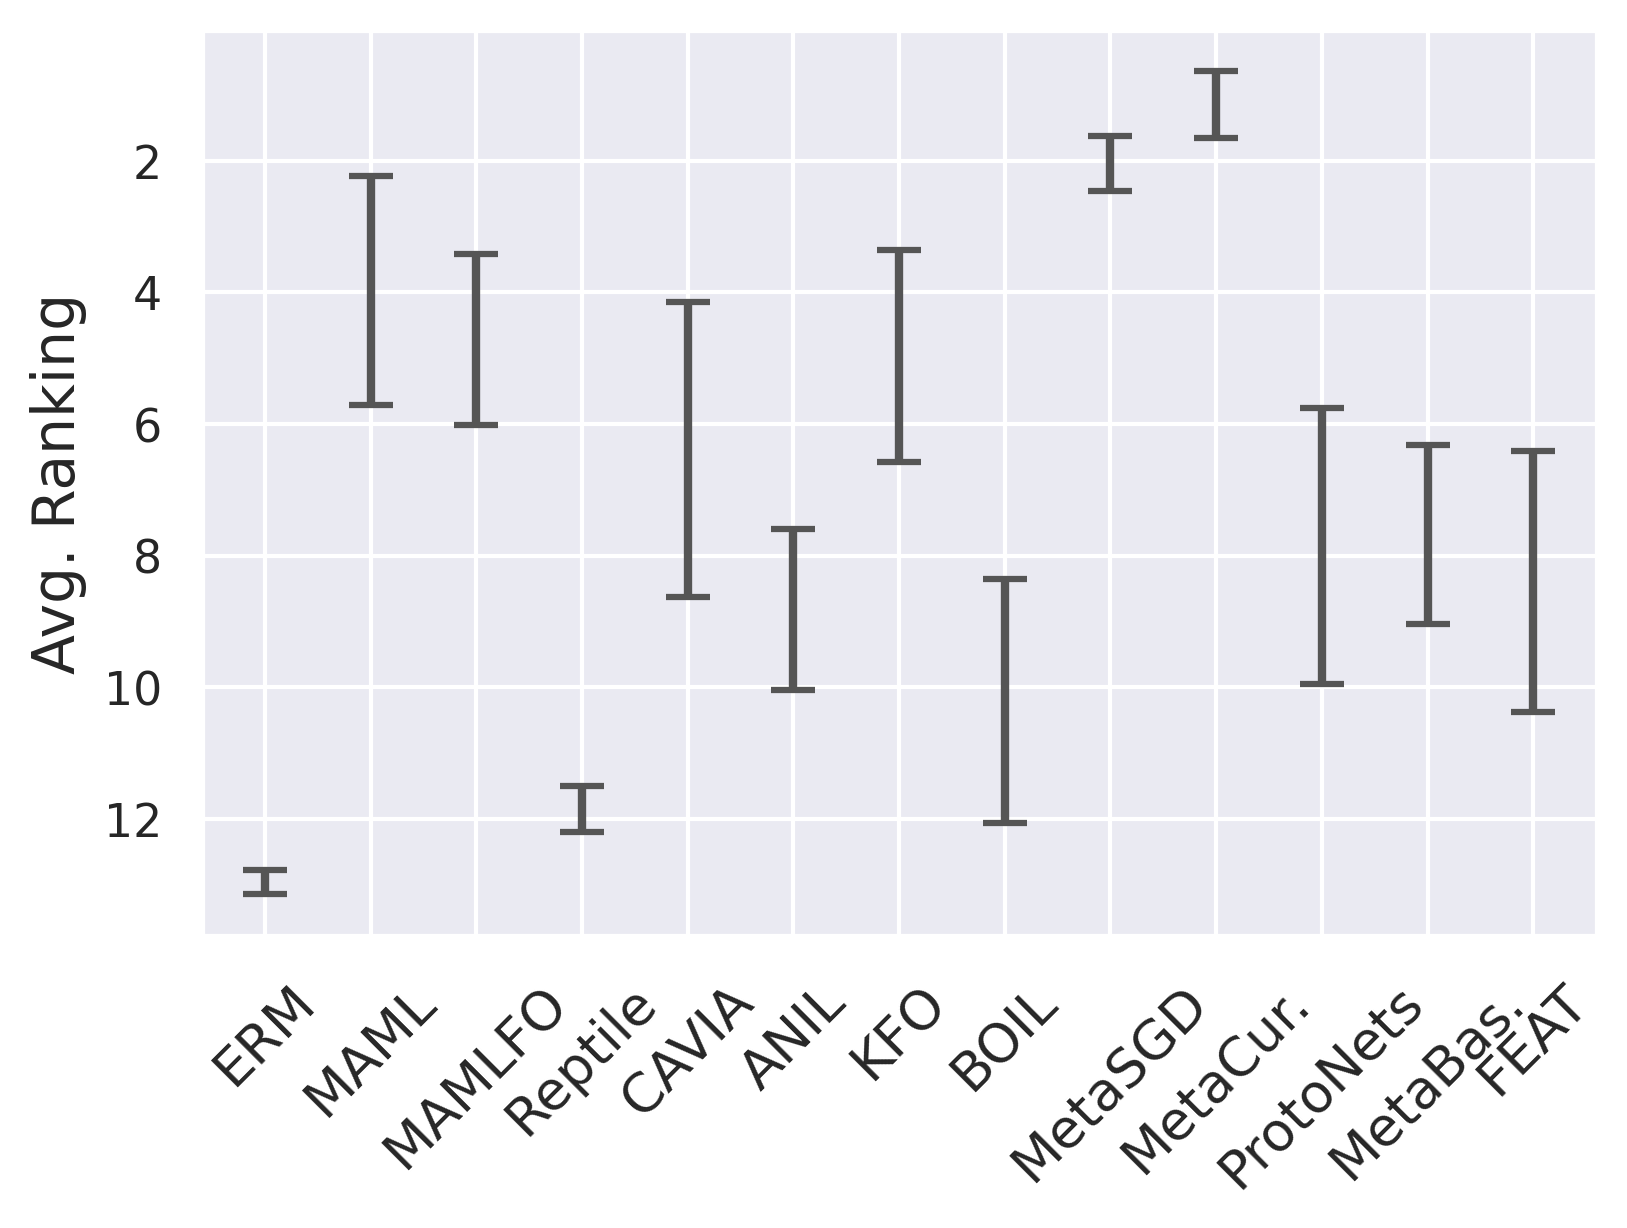

In [84]:
import seaborn as sns
sns.set()
plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.8)
import matplotlib.pyplot as plt

plt.style.use(['ieee'])
fig_size= (6, 4)
fig = plt.figure(figsize=fig_size)
fig.set_dpi(300)
ax = plt.gca()
ax.set_axisbelow(True)
plt.gca().invert_yaxis()
# plt.errorbar(np.arange(len(all_v))+ offsets[i], all_v, yerr = all_std, lw=0, \
#               elinewidth = 2., capsize=5.2, capthick=1.5, alpha = 1) 
mean_ranks = [np.mean(ranks) for key, ranks in learner_ranks.items()]
std_ranks = [np.std(ranks) for key, ranks in learner_ranks.items()]

print(mean_ranks)
labels = learner_ranks.keys()
plt.errorbar(np.arange(len(mean_ranks)), mean_ranks, yerr=std_ranks, ls="none",
             elinewidth = 2., capsize=5.2, capthick=1.5, ecolor="#555555")
# for i in np.arange(len(mean_ranks)):
#     plt.errorbar(i, mean_ranks[i], yerr=std_ranks[i], ls="none",
#              elinewidth = 2., capsize=5.2, capthick=1.5,)
plt.xticks(np.arange(len(mean_ranks)), labels, rotation=45, fontsize=13)
plt.ylabel("Avg. Ranking", fontsize=14)
# plt.grid()


[12.964285714285714, 3.9642857142857144, 4.714285714285714, 11.857142857142858, 6.392857142857143, 8.821428571428571, 4.964285714285714, 10.214285714285714, 2.0357142857142856, 1.1428571428571428, 7.857142857142857, 7.678571428571429, 8.392857142857142]
[13.0, 5.0, 3.5, 12.0, 7.5, 6.0, 4.25, 8.5, 2.5, 1.25, 8.25, 9.5, 9.75]


([<matplotlib.axis.XTick at 0x7faeb9bd07f0>,
 [Text(0, 0, 'ERM'),
  Text(1, 0, 'MAML'),
  Text(2, 0, 'MAMLFO'),
  Text(3, 0, 'Reptile'),
  Text(4, 0, 'CAVIA'),
  Text(5, 0, 'ANIL'),
  Text(6, 0, 'KFO'),
  Text(7, 0, 'BOIL'),
  Text(8, 0, 'MetaSGD'),
  Text(9, 0, 'MetaCur.'),
  Text(10, 0, 'ProtoNets'),
  Text(11, 0, 'MetaBas.'),
  Text(12, 0, 'FEAT')])

<Figure size 1800x1200 with 0 Axes>

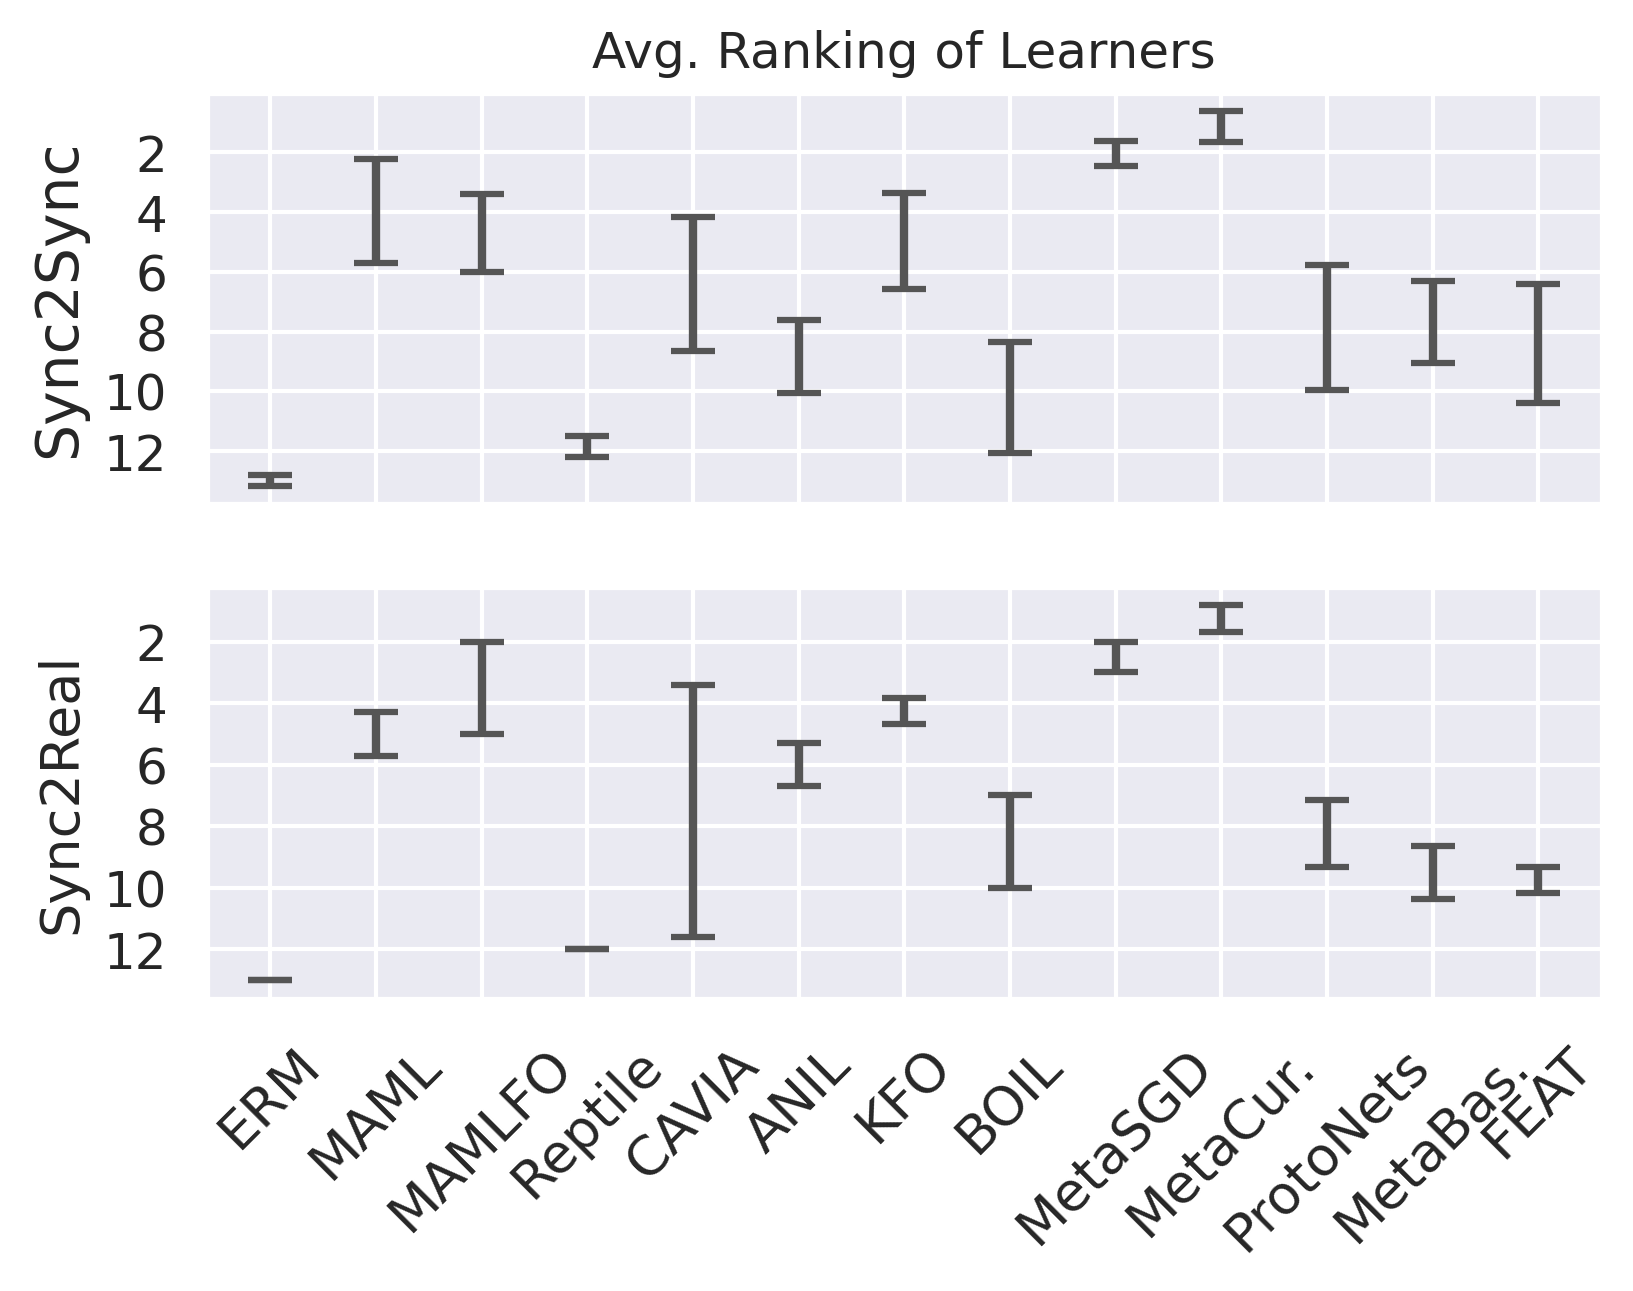

In [133]:
fig,(ax1,ax2) = plt.subplots(2, 1,sharex=True, figsize=(6,4))
fig.set_dpi(300)
axes = [ax1,ax2]

# plt.setp(axes)
# plt.sca(ax2).invert_yaxis() 
for ax in ax1, ax2:
    ax.grid(True)

#     plt.gca().invert_yaxis()

fig_size= (6, 4)
fig = plt.figure(figsize=fig_size)
fig.set_dpi(300)
# ax = plt.gca().
ax1.invert_yaxis()
ax2.invert_yaxis()
ax.set_axisbelow(True)

# plt.errorbar(np.arange(len(all_v))+ offsets[i], all_v, yerr = all_std, lw=0, \
#               elinewidth = 2., capsize=5.2, capthick=1.5, alpha = 1) 
mean_ranks = [np.mean(ranks) for key, ranks in learner_ranks.items()]
std_ranks = [np.std(ranks) for key, ranks in learner_ranks.items()]

print(mean_ranks)
ax1.set_title("Avg. Ranking of Learners")
labels = learner_ranks.keys()
ax1.errorbar(np.arange(len(mean_ranks)), mean_ranks, yerr=std_ranks, ls="none",
             elinewidth = 2., capsize=5.2, capthick=1.5, ecolor="#555555")
ax1.set_ylabel("Sync2Sync", fontsize=14)
plt.setp(axes, xticks=offsets)
plt.sca(ax1) 
plt.yticks(ticks=np.arange(2,14,2), fontsize=12)
# plt.grid()

#     ax1.scatter(offsets[i], all_v[1],marker=markers[i], #label = legends[i],  \
#                 s=60, alpha=0.9,  c = col1)

#     
#     plt.setp(axes, xticks=offsets)
#     plt.sca(ax2)       
#     plt.xticks(ticks=offsets, labels=labels, rotation=30, fontsize=14)
#     plt.yticks(fontsize=14)
#     fig.align_ylabels(axes)

mean_ranks_real = [np.mean(ranks) for key, ranks in learner_ranks_real.items()]
std_ranks_real = [np.std(ranks) for key, ranks in learner_ranks_real.items()]

print(mean_ranks_real)
labels = learner_ranks_real.keys()
ax2.errorbar(np.arange(len(mean_ranks_real)), mean_ranks_real, yerr=std_ranks_real, ls="none",
             elinewidth = 2., capsize=5.2, capthick=1.5, ecolor="#555555")


# plt.xticks(np.arange(len(mean_ranks_real)), labels, rotation=45, fontsize=13)
ax2.set_ylabel("Sync2Real", fontsize=13)
# plt.grid()

plt.setp(axes, xticks=offsets)
plt.sca(ax2)   
plt.yticks(ticks=np.arange(2,14,2), fontsize=12)
plt.xticks(ticks=np.arange(len(mean_ranks_real)), labels=labels, rotation=45, fontsize=13)
# plt.yticks(fontsize=14)
# fig.align_ylabels(axes)
    
# #     plt.xticks(ticks=offsets, labels=labels, rotation=30, fontsize=14)
# ax2.set_xticklabels(np.arange(len(mean_ranks_real)), labels, rotation=45, fontsize=13)
# plt.setp(ax2.get_xticklabels(), np.arange(len(mean_ranks_real)), labels, rotation=70, horizontalalignment='right')

In [ ]:
import seaborn as sns
sns.set()

fig,(ax1,ax2) = plt.subplots(2, 1,sharex=True, figsize=(6,4))
fig.set_dpi(150)
axes = [ax1,ax2]

linestyles = ["dotted","solid", "-"]

learners = ["MAML", "MAML_FO", "Reptile", "CAVIA", "ANIL", "KFO", "BOIL", "MetaSGD", "MetaCurvature",]   

labels = ["MAML", "MAML FO", "Reptile", "CAVIA", "ANIL", "KFO", "BOIL", "MetaSGD", "MetaCurv.",]   
targ_channel = "awgn"

y_min, y_max = 0.0008, 0.3

channel_hardness = ["awgn"]

offsets = np.arange(-0.3,0.6,0.1)

for i, learner in enumerate(learners):
    all_v = []
    all_std = []
    
    if learner.lower() == "boil":
        print("here")
        run_names = [
    "../pack1123/awgn_wide_" +learner.lower()+ "_15ts_5cls"+ "*json",
    "../pack0shot/awgn_wide_" +learner.lower()+ "_15ts_5cls*.json"]
    else: 
        run_names = [
    "../pack1123/awgn_wide_" +learner.lower()+ "_15ts_5cls"+ "*json",
    "../pack0shot/awgn_wide_" +learner.lower()+ "_0shot_15ts_5cls*.json"]

    for j, run_name in enumerate(run_names):
        print(run_name)

        run_name = glob.glob(run_name)
        if debug: print("glob ", run_name[0], type(run_name))
        data = load_from_json(run_name[0])


        if debug: print( data["iter"], run_name)
        value = data['val_ber_list']

        if learner is "test" or "boil":
            ep_id = -1
        else: 
            ep_id =  np.where(np.asarray(data["iter"])== total_it)[0][0] 
        if debug: print("value shape", np.shape(value), np.mean(value), " ep id ", ep_id)


        if targ_channel == "awgn":
            if debug: print(len(value))
            value = np.asarray(value[ep_id][:1050]).reshape(len(snr_list_awgn), -1)
            v_id = 10

        elif targ_channel == "bursty":
            value = np.asarray(value[ep_id][1950:]).reshape(len(snr_list_bursty), -1)
            v_id = 4

        elif targ_channel == "mem":
            value = np.asarray(value[ep_id][1050:1500]).reshape(len(snr_list_mem), -1)
            v_id = 4
#                 y_min = 0.0001
        elif targ_channel == "mp":
            value = np.asarray(value[ep_id][1500:1950]).reshape(len(snr_list_mp), -1)
            v_id = 4

        if debug: print("value shape", np.shape(value), np.mean(value[v_id]))

        all_v.append(np.mean(value[v_id]))

        all_std.append(np.std(value[v_id]))

    ls_id = 0
    print(all_v)
    # plot adapt
    eb = ax2.errorbar(offsets[i], all_v[0], yerr = all_std[0], lw=0, \
          elinewidth = 3., capsize=8.2, capthick=2, alpha = 0.9,  ecolor= colour[i], linestyle = linestyles[ls_id])
    eb[-1][0].set_linestyle(linestyles[ls_id])

    ax2.scatter(offsets[i], all_v[0],marker=markers[i], #label = legends[i],  \
                s=60, alpha=0.9,  c = colour[i])
    ax2.set_ylabel("BER \n Adapted Model")
#         plt.xticks(ticks=np.arange(-0.3, 0.5, 0.1))
    # plot zeroshot
    ls_id = 1
    eb = ax1.errorbar(offsets[i], all_v[1], yerr = all_std[1], lw=0, \
          elinewidth = 3., capsize=8.2, capthick=2, alpha = 0.9,  ecolor= colour[i], linestyle = linestyles[ls_id])
    eb[-1][0].set_linestyle(linestyles[ls_id])

    ax1.scatter(offsets[i], all_v[1],marker=markers[i], #label = legends[i],  \
                s=60, alpha=0.9,  c = colour[i])

    ax1.set_ylabel("BER \n Base Model")
    plt.setp(axes, xticks=offsets)
    plt.sca(ax2)       
    plt.xticks(ticks=offsets, labels=labels, rotation=30)

    fig.align_ylabels(axes)

    plt.yscale('log')
#         fig.tight_layout()


In [ ]:
# './models_metasgd/awgn_narrow_metasgd_15ts_5cls_v2_49999.pt'

def get_lrs (base_path, step):
    model_path = os.path.join(base_path+str(step)+".pt")
    print("model path loading from ", model_path)
    learner = l2l.algorithms.MetaSGD(model, lr=fast_lr, first_order=False)
    load_dict = torch.load(model_path)
    learner.load_state_dict(load_dict)


    name_mat = []

    lrs_mean, lrs_std = [], []

    params = learner.state_dict()
    for i in lr_ids:
        std, mean = torch.std_mean(params['lrs.'+str(i)])
        lrs_std.append(std.item())
        lrs_mean.append(mean.item())

    return lrs_mean, lrs_std

    

In [ ]:

meta_lr = 0.001
fast_lr = 0.1


# weights lrs 
lr_ids = np.arange(2, 17, 4)
lr_ids = np.append(lr_ids, 16)
# print(ids)
# args, device = get_args()
device = torch.cuda.current_device()
model = CNN4(10, hidden_size=64, layers=4)
model = model.to(device)

In [ ]:
path = '../models_metasgd/awgn_wide_metasgd_15ts_5cls_v2_'
step = 49999
for step in [9999, 19999, 29999, 39999, 49999]:
#     lrs_mean, lrs_std = [], []
    lr_mean, lr_std = get_lrs(path, step)
    plt.errorbar(range(len(lr_mean)), lr_mean, yerr=lr_std, label=str(step))
    
plt.legend(title="Meta Iter")
plt.ylabel("lrs")
plt.xlabel("Layer")
plt.xticks(range(0, 5), ["Conv-1", "Conv-2", "Conv-3", "Conv-4", "Classifier"])

In [ ]:
# path = './models_metasgd/awgn_wide_metasgd_15ts_5cls_v2_'
step = 49999
settings = ["awgn_narrow", "awgn_wide", "mix_hard_wide", "bursty_hard_narrow", "bursty_hard_wide"]
for setting in settings:
    path = "../models_metasgd/" + setting + "_metasgd_15ts_5cls_v2_"
#     lrs_mean, lrs_std = [], []
    lr_mean, lr_std = get_lrs(path, step)
    plt.errorbar(range(len(lr_mean)), lr_mean, yerr=lr_std, label=setting)
    
plt.legend(title="Train Family_Breadth", loc="upper left")
plt.ylabel("lrs")
plt.xlabel("Layer")
plt.xticks(range(0, 5), ["Conv-1", "Conv-2", "Conv-3", "Conv-4", "Classifier"])

In [ ]:
layers = ["Conv-1", "Conv-2", "Conv-3", "Conv-4", "Classifier"]
fig, axes = plt.subplots(1,5,figsize=(12, 3),sharex=True)

#     axes[0].set_title('Conv-1')
#     axes[0].errorbar(x, y1, yerr=y1err)

# path = './models_metasgd/awgn_wide_metasgd_15ts_5cls_v2_'
step = 49999
settings = ["awgn_narrow", "awgn_wide", "mix_hard_wide"]#, "bursty_hard_narrow", "bursty_hard_wide"]
for j, setting in enumerate(settings):
    path = "../models_metasgd/" + setting + "_metasgd_15ts_5cls_v2_"
#     lrs_mean, lrs_std = [], []
    lr_mean, lr_std = get_lrs(path, step)
    for i in range(len(lr_mean)):
        if j == 0:
            axes[i].set_title= layers[i]
#             axes[i].set_ylabel="Lrs"

        axes[i].errorbar(j, lr_mean[i], yerr=lr_std[i], label=setting)
        axes[i].scatter(j, lr_mean[i])
        

        
# for i in range(len(lr_mean)):   
#     print(layers[i])
#             axes[i].set_title= layers[i]
plt.legend(title="Train Family_Breadth", bbox_to_anchor=(2.05, 1),)
# plt.ylabel("lrs")
plt.xlabel("settings (see legend)")
# plt.xticks(range(0, 5), )
fig.suptitle("--- layers-->")
plt.show()


In [8]:
def gram_linear(x):
  """Compute Gram (kernel) matrix for a linear kernel.

  Args:
    x: A num_examples x num_features matrix of features.

  Returns:
    A num_examples x num_examples Gram matrix of examples.
  """
  return x.dot(x.T)


def gram_rbf(x, threshold=1.0):
  """Compute Gram (kernel) matrix for an RBF kernel.

  Args:
    x: A num_examples x num_features matrix of features.
    threshold: Fraction of median Euclidean distance to use as RBF kernel
      bandwidth. (This is the heuristic we use in the paper. There are other
      possible ways to set the bandwidth; we didn't try them.)

  Returns:
    A num_examples x num_examples Gram matrix of examples.
  """
  dot_products = x.dot(x.T)
  sq_norms = np.diag(dot_products)
  sq_distances = -2 * dot_products + sq_norms[:, None] + sq_norms[None, :]
  sq_median_distance = np.median(sq_distances)
  return np.exp(-sq_distances / (2 * threshold ** 2 * sq_median_distance))


def center_gram(gram, unbiased=False):
  """Center a symmetric Gram matrix.

  This is equvialent to centering the (possibly infinite-dimensional) features
  induced by the kernel before computing the Gram matrix.

  Args:
    gram: A num_examples x num_examples symmetric matrix.
    unbiased: Whether to adjust the Gram matrix in order to compute an unbiased
      estimate of HSIC. Note that this estimator may be negative.

  Returns:
    A symmetric matrix with centered columns and rows.
  """
  if not np.allclose(gram, gram.T):
    raise ValueError('Input must be a symmetric matrix.')
  gram = gram.copy()

  if unbiased:
    # This formulation of the U-statistic, from Szekely, G. J., & Rizzo, M.
    # L. (2014). Partial distance correlation with methods for dissimilarities.
    # The Annals of Statistics, 42(6), 2382-2412, seems to be more numerically
    # stable than the alternative from Song et al. (2007).
    n = gram.shape[0]
    np.fill_diagonal(gram, 0)
    means = np.sum(gram, 0, dtype=np.float64) / (n - 2)
    means -= np.sum(means) / (2 * (n - 1))
    gram -= means[:, None]
    gram -= means[None, :]
    np.fill_diagonal(gram, 0)
  else:
    means = np.mean(gram, 0, dtype=np.float64)
    means -= np.mean(means) / 2
    gram -= means[:, None]
    gram -= means[None, :]

  return gram


def cka(gram_x, gram_y, debiased=False):
  """Compute CKA.

  Args:
    gram_x: A num_examples x num_examples Gram matrix.
    gram_y: A num_examples x num_examples Gram matrix.
    debiased: Use unbiased estimator of HSIC. CKA may still be biased.

  Returns:
    The value of CKA between X and Y.
  """
  gram_x = center_gram(gram_x, unbiased=debiased)
  gram_y = center_gram(gram_y, unbiased=debiased)

  # Note: To obtain HSIC, this should be divided by (n-1)**2 (biased variant) or
  # n*(n-3) (unbiased variant), but this cancels for CKA.
  scaled_hsic = gram_x.ravel().dot(gram_y.ravel())

  normalization_x = np.linalg.norm(gram_x)
  normalization_y = np.linalg.norm(gram_y)
  return scaled_hsic / (normalization_x * normalization_y)


def _debiased_dot_product_similarity_helper(
    xty, sum_squared_rows_x, sum_squared_rows_y, squared_norm_x, squared_norm_y,
    n):
  """Helper for computing debiased dot product similarity (i.e. linear HSIC)."""
  # This formula can be derived by manipulating the unbiased estimator from
  # Song et al. (2007).
  return (
      xty - n / (n - 2.) * sum_squared_rows_x.dot(sum_squared_rows_y)
      + squared_norm_x * squared_norm_y / ((n - 1) * (n - 2)))


def feature_space_linear_cka(features_x, features_y, debiased=False):
  """Compute CKA with a linear kernel, in feature space.

  This is typically faster than computing the Gram matrix when there are fewer
  features than examples.

  Args:
    features_x: A num_examples x num_features matrix of features.
    features_y: A num_examples x num_features matrix of features.
    debiased: Use unbiased estimator of dot product similarity. CKA may still be
      biased. Note that this estimator may be negative.

  Returns:
    The value of CKA between X and Y.
  """
  features_x = features_x - np.mean(features_x, 0, keepdims=True)
  features_y = features_y - np.mean(features_y, 0, keepdims=True)

  dot_product_similarity = np.linalg.norm(features_x.T.dot(features_y)) ** 2
  normalization_x = np.linalg.norm(features_x.T.dot(features_x))
  normalization_y = np.linalg.norm(features_y.T.dot(features_y))

  if debiased:
    n = features_x.shape[0]
    # Equivalent to np.sum(features_x ** 2, 1) but avoids an intermediate array.
    sum_squared_rows_x = np.einsum('ij,ij->i', features_x, features_x)
    sum_squared_rows_y = np.einsum('ij,ij->i', features_y, features_y)
    squared_norm_x = np.sum(sum_squared_rows_x)
    squared_norm_y = np.sum(sum_squared_rows_y)

    dot_product_similarity = _debiased_dot_product_similarity_helper(
        dot_product_similarity, sum_squared_rows_x, sum_squared_rows_y,
        squared_norm_x, squared_norm_y, n)
    normalization_x = np.sqrt(_debiased_dot_product_similarity_helper(
        normalization_x ** 2, sum_squared_rows_x, sum_squared_rows_x,
        squared_norm_x, squared_norm_x, n))
    normalization_y = np.sqrt(_debiased_dot_product_similarity_helper(
        normalization_y ** 2, sum_squared_rows_y, sum_squared_rows_y,
        squared_norm_y, squared_norm_y, n))

  return dot_product_similarity / (normalization_x * normalization_y)

In [9]:

def cca(features_x, features_y):
  """Compute the mean squared CCA correlation (R^2_{CCA}).

  Args:
    features_x: A num_examples x num_features matrix of features.
    features_y: A num_examples x num_features matrix of features.

  Returns:
    The mean squared CCA correlations between X and Y.
  """
  qx, _ = np.linalg.qr(features_x)  # Or use SVD with full_matrices=False.
  qy, _ = np.linalg.qr(features_y)
  return np.linalg.norm(qx.T.dot(qy)) ** 2 / min(
      features_x.shape[1], features_y.shape[1])

In [10]:
np.random.seed(1337)
X = np.random.randn(100, 10)
Y = np.random.randn(100, 10) + X
print(type(X), np.shape(X))

<class 'numpy.ndarray'> (100, 10)


In [11]:

cka_from_examples = cka(gram_linear(X), gram_linear(Y))
cka_from_features = feature_space_linear_cka(X, Y)

print('Linear CKA from Examples: {:.5f}'.format(cka_from_examples))
print('Linear CKA from Features: {:.5f}'.format(cka_from_features))
np.testing.assert_almost_equal(cka_from_examples, cka_from_features)

Linear CKA from Examples: 0.55761
Linear CKA from Features: 0.55761


In [12]:
path_before = "../activations/awgn_narrow_maml_15ts_5cls_v2_before.pickle"
path_after = "../activations/awgn_narrow_maml_15ts_5cls_v2_after.pickle"

with open(path_before, 'rb') as f:
    acts1 = pickle.load(f)
    
with open(path_after, 'rb') as f:
    acts2 = pickle.load(f)


In [13]:

cka_all, cca_all = [], []
for layer_key in acts1.keys():
    print(layer_key)


    print(acts1.keys())
    print(acts1[layer_key].cpu().detach().numpy().shape)
    
    if layer_key != "module.classifier":
        avg_acts1 = np.mean(acts1[layer_key].cpu().detach().numpy(), axis=(1,2))
        avg_acts2 = np.mean(acts2[layer_key].cpu().detach().numpy(), axis=(1,2))
    else:
        avg_acts1 = acts1[layer_key].cpu().detach().numpy()
        avg_acts2 = acts2[layer_key].cpu().detach().numpy()
    print(avg_acts1.shape, avg_acts2.shape)
    cka_from_features = feature_space_linear_cka(avg_acts1, avg_acts2)
    cca_layer = cca(avg_acts1, avg_acts2)
    # print('Linear CKA from Examples: {:.5f}'.format(cka_from_examples))
    print('Linear CKA from Features: {:.5f}'.format(cka_from_features))
    cka_all.append(cka_from_features)
    cca_all.append(cca_layer)

module.features.0.0.conv
dict_keys(['module.features.0.0.conv', 'module.features.0.1.conv', 'module.features.0.2.conv', 'module.features.0.3.conv', 'module.classifier'])
(150000, 64, 5, 1)
(150000, 1) (150000, 1)
Linear CKA from Features: 0.99907
module.features.0.1.conv
dict_keys(['module.features.0.0.conv', 'module.features.0.1.conv', 'module.features.0.2.conv', 'module.features.0.3.conv', 'module.classifier'])
(150000, 64, 3, 1)
(150000, 1) (150000, 1)
Linear CKA from Features: 0.97813
module.features.0.2.conv
dict_keys(['module.features.0.0.conv', 'module.features.0.1.conv', 'module.features.0.2.conv', 'module.features.0.3.conv', 'module.classifier'])
(150000, 64, 2, 1)
(150000, 1) (150000, 1)
Linear CKA from Features: 0.92063
module.features.0.3.conv
dict_keys(['module.features.0.0.conv', 'module.features.0.1.conv', 'module.features.0.2.conv', 'module.features.0.3.conv', 'module.classifier'])
(150000, 64, 1, 1)
(150000, 1) (150000, 1)
Linear CKA from Features: 0.02484
module.class

([<matplotlib.axis.XTick at 0x7faede5a37f0>,
 [Text(0, 0, 'conv0'),
  Text(1, 0, 'conv1'),
  Text(2, 0, 'conv2'),
  Text(3, 0, 'conv3'),
  Text(4, 0, 'classifier')])

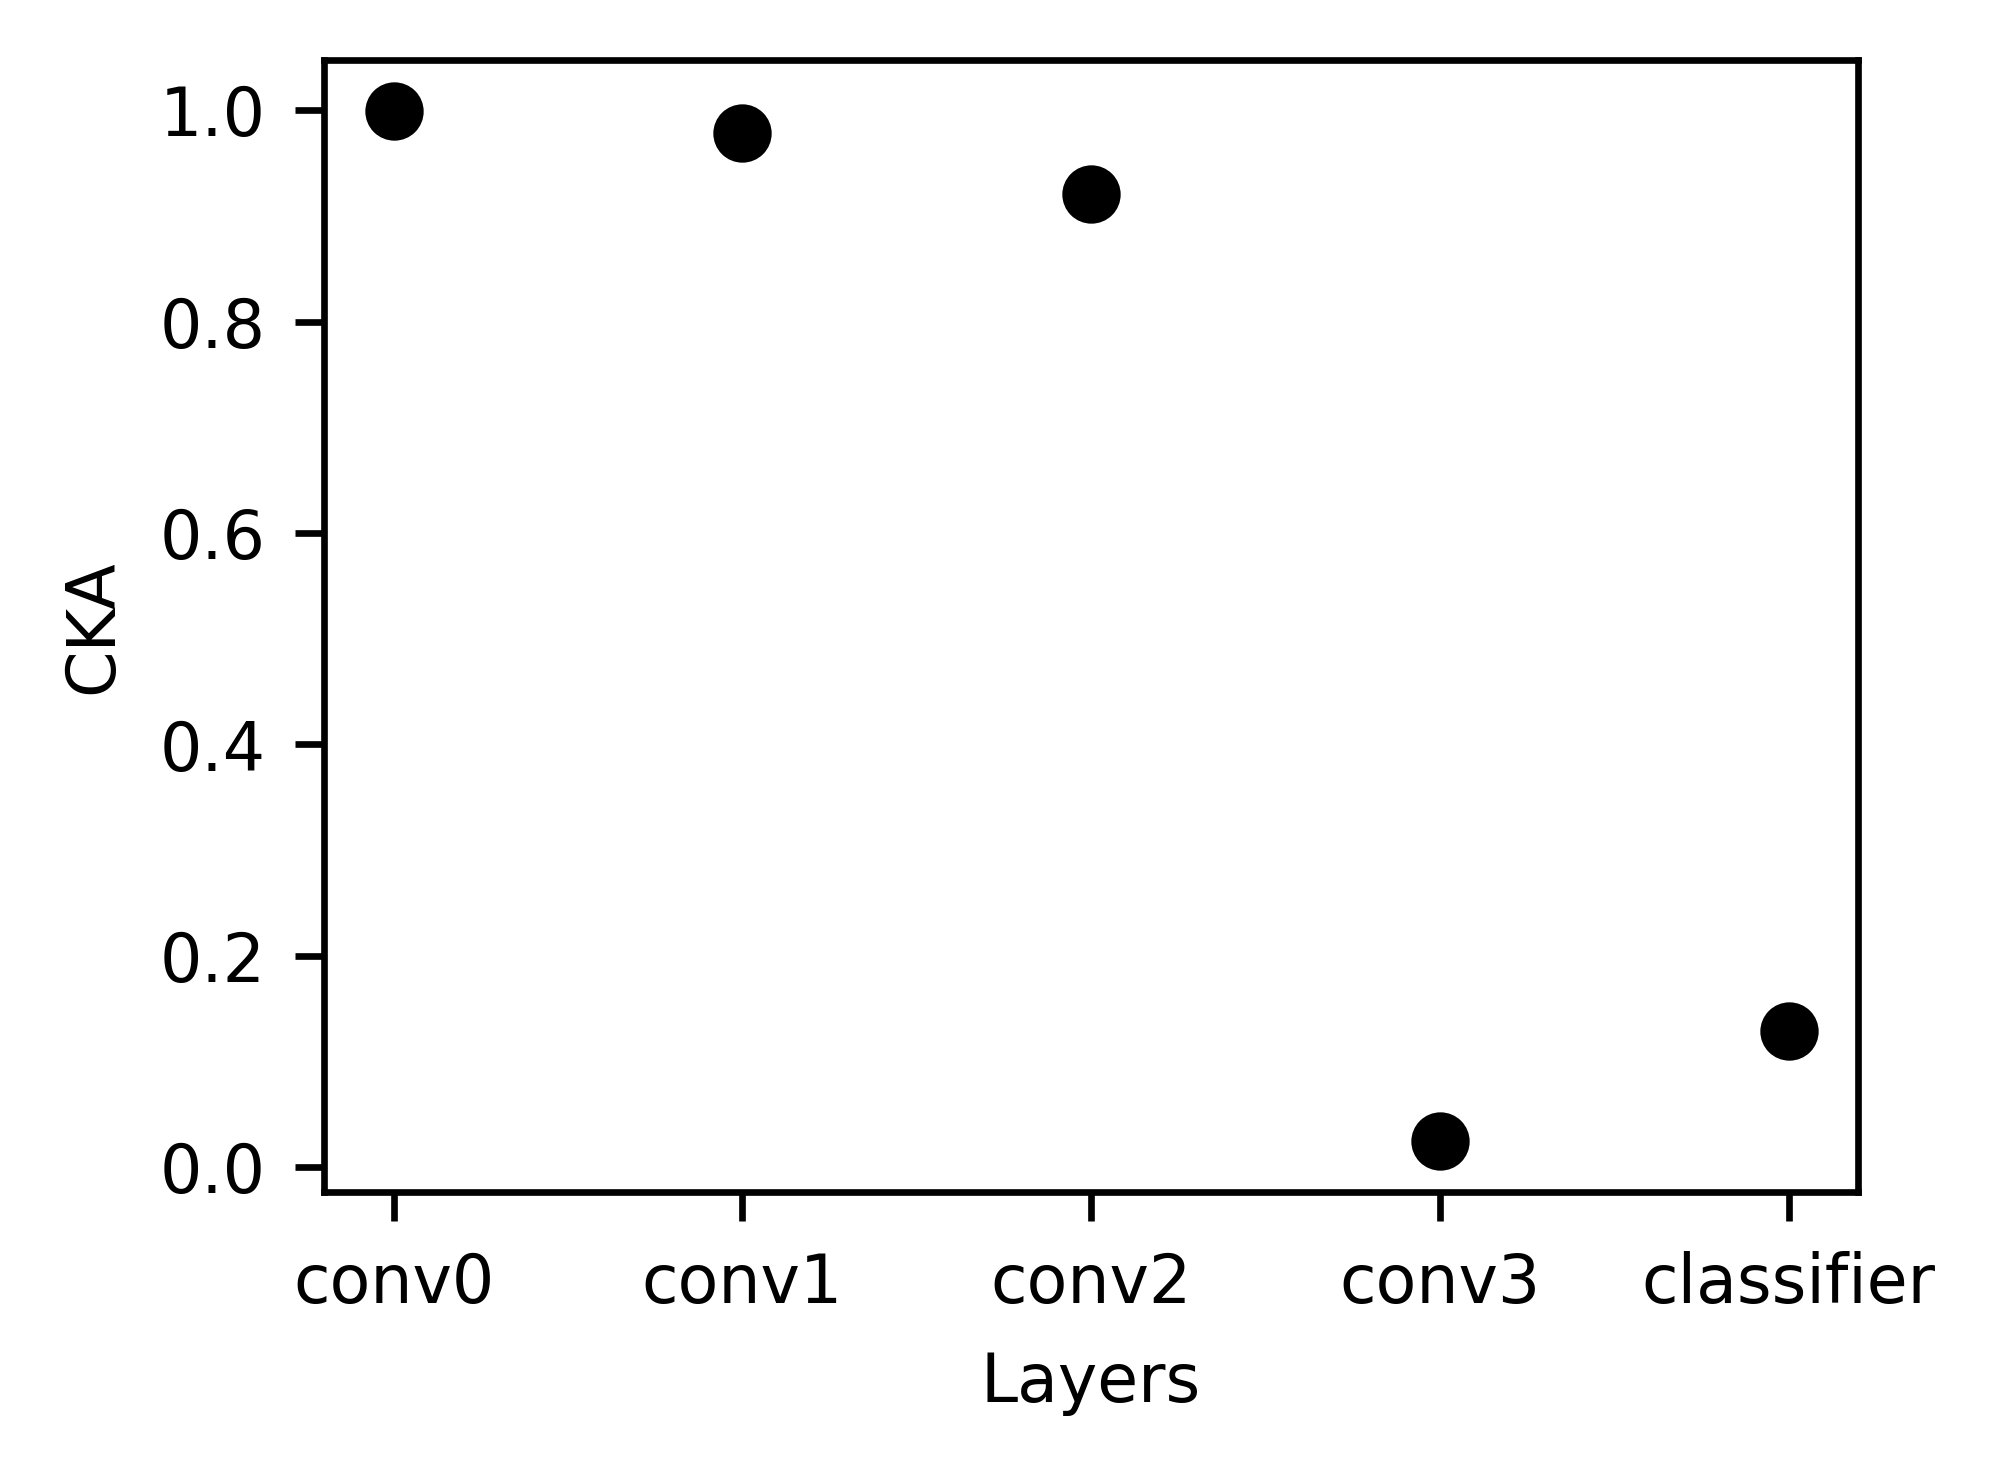

In [14]:
plt.scatter(range(len(cka_all)), cka_all)
# plt.scatter(range(len(cca_all)), cca_all)
plt.xlabel("Layers")
plt.ylabel("CKA")
plt.xticks(np.arange(5), ["conv0","conv1","conv2","conv3", "classifier"])

([<matplotlib.axis.XTick at 0x7faede5185f8>,
 [Text(0, 0, 'conv0'),
  Text(1, 0, 'conv1'),
  Text(2, 0, 'conv2'),
  Text(3, 0, 'conv3'),
  Text(4, 0, 'classifier')])

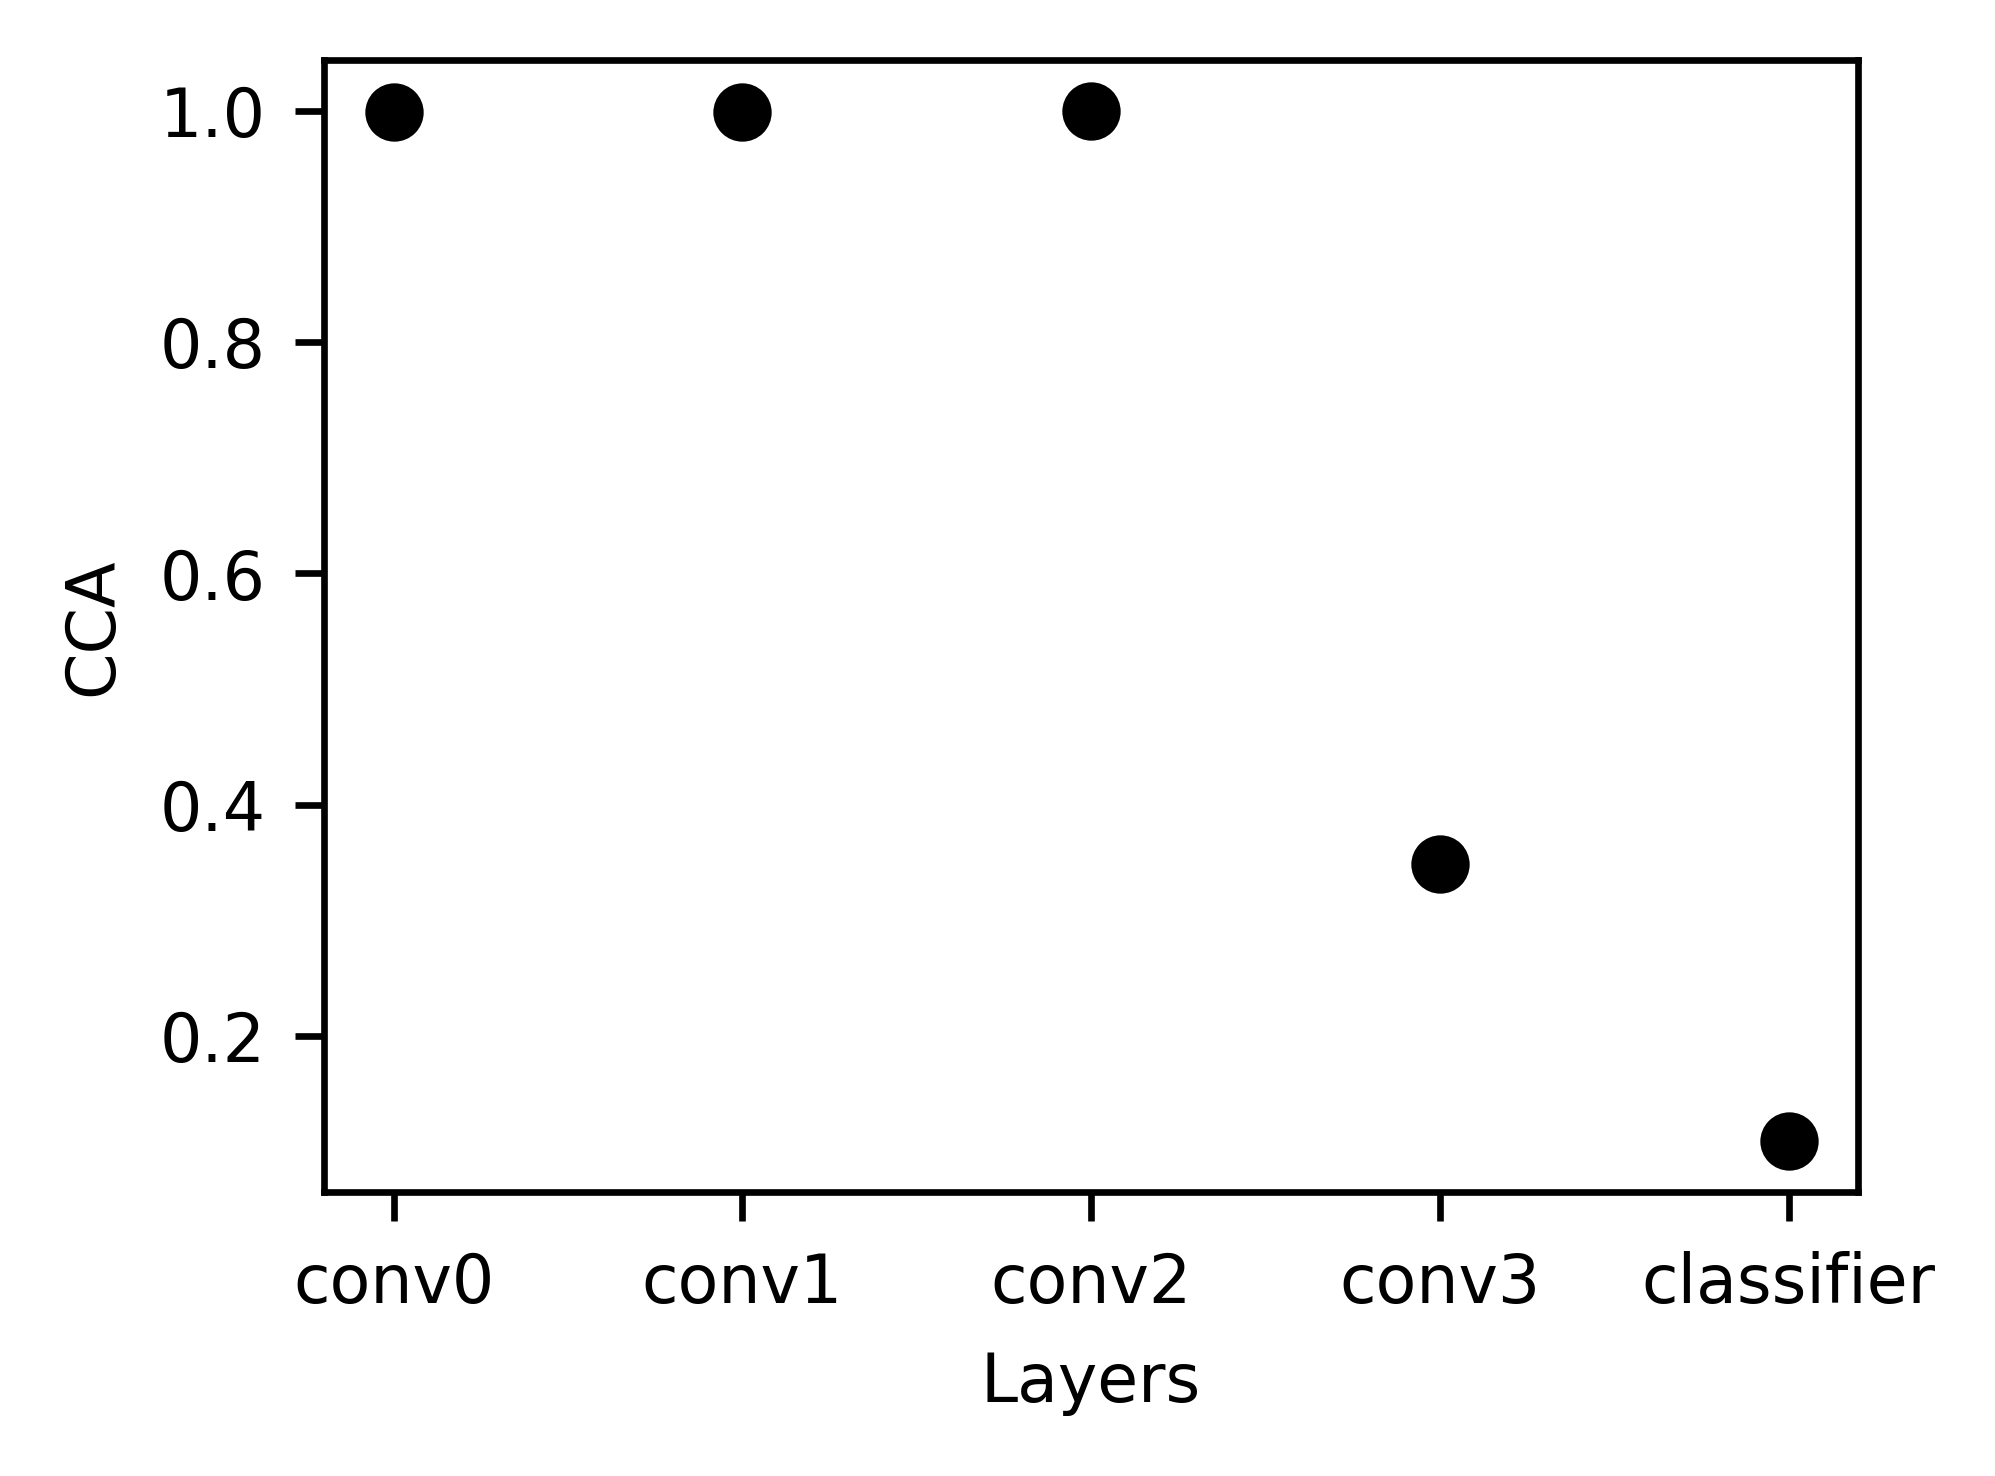

In [15]:
plt.scatter(range(len(cca_all)), cca_all)
plt.xlabel("Layers")
plt.ylabel("CCA")
plt.xticks(np.arange(5), ["conv0","conv1","conv2","conv3", "classifier"])

In [ ]:
mp = [-0.006872186626615335, 0.0054088628604428545, 0.21187789366764473]
AWGN = [0.004528778118999866, -0.022436350724075037, 0.21187789366764473]
mem = [0.013712705229771058, 0.048120734291680164, 0.21187789366764473]
bursty = [0.0008412237602826076, 0.15039439956747458, 0.21187789366764473]



In [ ]:
plt.scatter(mp, [1]*3, label='MP')
plt.scatter(AWGN, [2]*3, label='AWGN')
plt.scatter(mem, [3]*3, label='Mem')
plt.scatter(bursty, [4]*3, label='bursty')
plt.xlabel ("diversity score")
plt.ylabel ("channel fam")
plt.legend()



In [ ]:
#Shift (Figure 7 Across Family). Order: awgn-bursty-mem-mp-mixed (training)
AWGN_shift = [-2.03479259, 7.6138539,  2.35153803, 0.69821692, 1.10275053]
bursty_shift= [ 7.6138539, -2.97433989, 9.90015855, 6.81600768, 5.20918333]
mem_shift= [ 2.35153803, 9.90015855, -2.3325577,  2.9772281,  1.97443182]
mp_shift= [ 0.69821692, 6.81600768, 2.9772281, -2.06162308, 1.17404687]

allshifts = [AWGN_shift, bursty_shift, mem_shift, mp_shift]

markers = ["+", "<", "*", "^", "o"]
for i, shifts in enumerate(allshifts):
    
    for s, shift in enumerate(shifts):
#         print(s, i)
        plt.scatter(shift, i, marker= markers[s])
        
plt.xlabel ("shift score")
plt.ylabel ("target channel fam")
plt.title("--awgn-bursty-mem-mp-mixed (training)-->")
plt.legend()
plt.yticks(np.arange(0, 4), ["awgn", "bursty", "mem", "MP"] )

In [ ]:
names = [
        "mem_hard_narrow_maml_15ts_5cls_v2", 
#          "mem_hard_mid_maml_15ts_5cls_v2",
         "mem_hard_wide_maml_15ts_5cls_v2", 
       
         "mp_hard_narrow_maml_15ts_5cls_v2", 
#          "mp_hard_mid_maml_15ts_5cls_v2",
         "mp_hard_wide_maml_15ts_5cls_v2", 
         "awgn_narrow_maml_15ts_5cls_v2",
#     "awgn_mid_maml_set_nd_15ts_5cls",
    "awgn_wide_maml_15ts_5cls_v2",
        
    "bursty_hard_narrow_maml_15ts_5cls_v2", 
#     "bursty_hard_mid_maml_15ts_5cls_v2", 
    "bursty_hard_wide_maml_15ts_5cls_v2",
 "mix_hard_wide_maml_15ts_5cls_v2", 
        ]
    
for name in names:
    path_before = "../activations/targ_awgn/"+ name +"_before.pickle"
    path_after = "../activations/targ_awgn/"+ name +"_after.pickle"

    with open(path_before, 'rb') as f:
        acts1 = pickle.load(f)

    with open(path_after, 'rb') as f:
        acts2 = pickle.load(f)

    cka_all, cca_all = [], []
    for layer_key in acts1.keys():
        print(layer_key)


        print(acts1.keys())
        print(acts1[layer_key].cpu().detach().numpy().shape)

        if layer_key != "module.classifier":
            avg_acts1 = np.mean(acts1[layer_key].cpu().detach().numpy(), axis=(1,2))
            avg_acts2 = np.mean(acts2[layer_key].cpu().detach().numpy(), axis=(1,2))
        else:
            avg_acts1 = acts1[layer_key].cpu().detach().numpy()
            avg_acts2 = acts2[layer_key].cpu().detach().numpy()
        
        print(avg_acts1.shape, avg_acts2.shape)
        cka_from_features = feature_space_linear_cka(avg_acts1, avg_acts2)
        cca_layer = cca(avg_acts1, avg_acts2)
        # print('Linear CKA from Examples: {:.5f}'.format(cka_from_examples))
        print('Linear CKA from Features: {:.5f}'.format(cka_from_features))
        cka_all.append(cka_from_features)
        cca_all.append(cca_layer)

    plt.scatter(range(len(cka_all)), cka_all, label=name[:15])
# plt.scatter(range(len(cca_all)), cca_all)
plt.xlabel("Layers")
plt.ylabel("CKA")
# plt.legend()
plt.xticks(np.arange(5), ["conv0","conv1","conv2","conv3", "classifier"])

In [16]:
names = [

#     "awgn_mid_maml_set_nd_15ts_5cls",
    
#     "targ_awgn_snr0/awgn_narrow_maml_15ts_5cls_v2",
#     "targ_awgn_snr0/awgn_wide_maml_15ts_5cls_v2",
    "targ_awgn_snr0/bursty_hard_wide_maml_15ts_5cls_v2",
    "targ_awgn_snr0/mem_hard_wide_maml_15ts_5cls_v2",
    "targ_awgn_snr0/mp_hard_wide_maml_15ts_5cls_v2",
    "targ_awgn_snr0/mix_hard_wide_maml_15ts_5cls_v2",
        ]
    
for name in names:
    path_before = "../activations/"+ name +"_before.pickle"
    path_after = "../activations/"+ name +"_after.pickle"

    with open(path_before, 'rb') as f:
        acts1 = pickle.load(f)

    with open(path_after, 'rb') as f:
        acts2 = pickle.load(f)

    cka_all, cca_all = [], []
    for layer_key in acts1.keys():
        print(layer_key)


        print(acts1.keys())
        print(acts1[layer_key].cpu().detach().numpy().shape)

        if layer_key != "module.classifier":
            avg_acts1 = np.mean(acts1[layer_key].cpu().detach().numpy(), axis=(1,2))
            avg_acts2 = np.mean(acts2[layer_key].cpu().detach().numpy(), axis=(1,2))
        else:
            avg_acts1 = acts1[layer_key].cpu().detach().numpy()
            avg_acts2 = acts2[layer_key].cpu().detach().numpy()
        
        print(avg_acts1.shape, avg_acts2.shape)
        cka_from_features = feature_space_linear_cka(avg_acts1, avg_acts2)
        cca_layer = cca(avg_acts1, avg_acts2)
        # print('Linear CKA from Examples: {:.5f}'.format(cka_from_examples))
        print('Linear CKA from Features: {:.5f}'.format(cka_from_features))
        cka_all.append(cka_from_features)
        cca_all.append(cca_layer)

    plt.scatter(range(len(cka_all)), cka_all, label=name[15:26])
# plt.scatter(range(len(cca_all)), cca_all)
plt.xlabel("Layers")
plt.ylabel("CKA")
plt.legend()
plt.xticks(np.arange(5), ["conv0","conv1","conv2","conv3", "classifier"])

FileNotFoundError: [Errno 2] No such file or directory: '../activations/targ_awgn_snr0/bursty_hard_wide_maml_15ts_5cls_v2_before.pickle'

In [ ]:
names = [

#     "awgn_mid_maml_set_nd_15ts_5cls",
    
#     "targ_awgn_snr0/awgn_narrow_maml_15ts_5cls_v2",
    "targ_awgn_snr0/awgn_wide_maml_15ts_5cls_v2",
#   "targ_awgn_snr0/awgn_wide_maml_15ts_5cls_v2_run2",
#     "targ_awgn_snr0/mix_hard_wide_maml_15ts_5cls_v2",
#     "targ_awgn_snr0/mix_hard_wide_maml_15ts_5cls_v2_run2",
        ]
    
for name in names:
    path_before = "../activations/"+ name +"_before.pickle"
    path_after = "../activations/"+ name +"_after.pickle"

    with open(path_before, 'rb') as f:
        acts1 = pickle.load(f)

    with open(path_after, 'rb') as f:
        acts2 = pickle.load(f)

    cka_all, cca_all = [], []
    for layer_key in acts1.keys():
        print(layer_key)


        print(acts1.keys())
        print(acts1[layer_key].cpu().detach().numpy().shape)

        if layer_key != "module.classifier":
            avg_acts1 = np.mean(acts1[layer_key].cpu().detach().numpy(), axis=(1,2))
            avg_acts2 = np.mean(acts2[layer_key].cpu().detach().numpy(), axis=(1,2))
        else:
            avg_acts1 = acts1[layer_key].cpu().detach().numpy()
            avg_acts2 = acts2[layer_key].cpu().detach().numpy()
        
        print(avg_acts1.shape, avg_acts2.shape)
        cka_from_features = feature_space_linear_cka(avg_acts1, avg_acts2)
        cca_layer = cca(avg_acts1, avg_acts2)
        # print('Linear CKA from Examples: {:.5f}'.format(cka_from_examples))
        print('Linear CKA from Features: {:.5f}'.format(cka_from_features))
        cka_all.append(cka_from_features)
        cca_all.append(cca_layer)

    plt.scatter(range(len(cka_all)), cka_all, label=name[15:26])
# plt.scatter(range(len(cca_all)), cca_all)
plt.xlabel("Layers")
plt.ylabel("CKA")
plt.legend()
plt.xticks(np.arange(5), ["conv0","conv1","conv2","conv3", "classifier"])

In [ ]:
names = [

#     "awgn_mid_maml_set_nd_15ts_5cls",
    
    "targ_awgn_snr0/awgn_narrow_maml_15ts_5cls_v2",
    "targ_awgn_snr0/awgn_wide_maml_15ts_5cls_v2",
    
#   "targ_awgn_snr0/awgn_wide_maml_15ts_5cls_v2_run2",
    "targ_awgn_snr0/mix_hard_wide_maml_15ts_5cls_v2",
#     "targ_awgn_snr0/mix_hard_wide_maml_15ts_5cls_v2_run2",
        ]
    
for name in names:
    path_before = "../activations/"+ name +"_before.pickle"
    path_after = "../activations/"+ name +"_after.pickle"

    with open(path_before, 'rb') as f:
        acts1 = pickle.load(f)

    with open(path_after, 'rb') as f:
        acts2 = pickle.load(f)

    cka_all, cca_all = [], []
    for layer_key in acts1.keys():
        print(layer_key)


        print(acts1.keys())
        print(acts1[layer_key].cpu().detach().numpy().shape)

        cka_layer, cca_layer = [], []
        for act_id in range(3750):
            
            if layer_key != "module.classifier":
                avg_acts1 = np.mean(acts1[layer_key][act_id].cpu().detach().numpy(), axis=(1,2))
                avg_acts2 = np.mean(acts2[layer_key][act_id].cpu().detach().numpy(), axis=(1,2))
            else:
                avg_acts1 = acts1[layer_key][act_id].cpu().detach().numpy()
                avg_acts2 = acts2[layer_key][act_id].cpu().detach().numpy()

            print(avg_acts1.shape, avg_acts2.shape)
            cka_act = feature_space_linear_cka(avg_acts1, avg_acts2)
            print(cka_act)
#             cca_act = cca(avg_acts1, avg_acts2)

            cka_layer.append(cka_act)
#             cca_layer=cca_layer.append(cca_act)
            
        # print('Linear CKA from Examples: {:.5f}'.format(cka_from_examples))
        print('Linear CKA from Features: {:.5f}'.format(cka_from_features))
        cka_all.append(cka_layer)
#         cca_all.append(cca_layer)

    print(len(cka_all), np.arange(len(cka_all)), len(np.mean(cka_all, axis=1)))
    plt.errorbar(np.arange(len(cka_all)), np.mean(cka_all, axis=1), yerr=np.std(cka_all, axis=1), label=name[15:26])
    plt.scatter(np.arange(len(cka_all)), np.mean(cka_all, axis=1))
# plt.scatter(range(len(cca_all)), cca_all)
plt.xlabel("Layers")
plt.ylabel("CKA")
plt.legend()
plt.xticks(np.arange(5), ["conv0","conv1","conv2","conv3", "classifier"])

awgn
(3750, 64, 5, 1)
(3750, 64, 3, 1)
(3750, 64, 2, 1)
(3750, 64, 1, 1)
(3750, 10)
hard_wide_m  source mean cka 0.9550632175595756  classifier cka 0.11463761107904975
(3750, 64, 5, 1)
(3750, 64, 3, 1)
(3750, 64, 2, 1)
(3750, 64, 1, 1)
(3750, 10)
d_wide_maml  source mean cka 0.9375757947902917  classifier cka 0.11887294902788116
(3750, 64, 5, 1)
(3750, 64, 3, 1)
(3750, 64, 2, 1)
(3750, 64, 1, 1)
(3750, 10)
_wide_maml_  source mean cka 0.914778127825551  classifier cka 0.16595847104731054
(3750, 64, 5, 1)
(3750, 64, 3, 1)
(3750, 64, 2, 1)
(3750, 64, 1, 1)
(3750, 10)
d_wide_maml  source mean cka 0.8203771638708138  classifier cka 0.12786237957520044
bursty
(3750, 64, 5, 1)
(3750, 64, 3, 1)
(3750, 64, 2, 1)
(3750, 64, 1, 1)
(3750, 10)
de_maml_15t  source mean cka 0.9165102330564866  classifier cka 0.1032024178087637
(3750, 64, 5, 1)
(3750, 64, 3, 1)
(3750, 64, 2, 1)
(3750, 64, 1, 1)
(3750, 10)
d_wide_maml  source mean cka 0.9498904284069095  classifier cka 0.14384067798917272
(3750, 64, 5

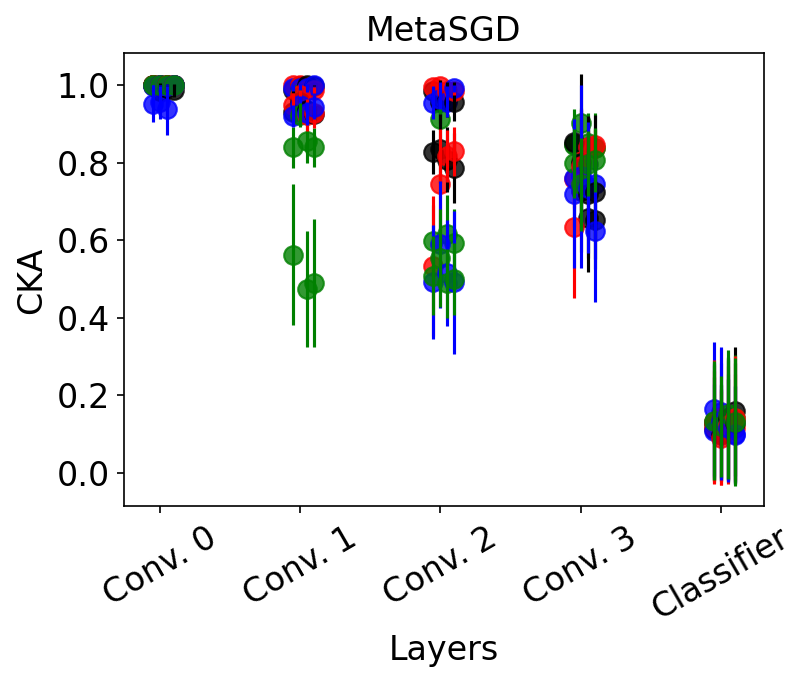

In [30]:

fig_size= (5.5, 4)
fig = plt.figure(figsize=fig_size)
fig.set_dpi(150)
learner= "MAML"
names = [
#     "targ_mem_center/awgn_wide_" +learner.lower()+ "_15ts_5cls_v2",
#     "targ_mem_center/bursty_hard_wide_" +learner.lower()+ "_15ts_5cls_v2",
#      "targ_mem_center/mem_hard_wide_" +learner.lower()+ "_15ts_5cls_v2",
#     "targ_mem_center/mp_hard_wide_" +learner.lower()+ "_15ts_5cls_v2",
#     "targ_mem_center/mix_hard_wide_" +learner.lower()+ "_15ts_5cls_v2",

    "_center/awgn_wide_" +learner.lower()+ "_15ts_5cls_v2",
    "_center/bursty_hard_wide_" +learner.lower()+ "_15ts_5cls_v2",
    "_center/mem_hard_wide_" +learner.lower()+ "_15ts_5cls_v2",
    "_center/mp_hard_wide_" +learner.lower()+ "_15ts_5cls_v2",
    "_center/mix_hard_wide_" +learner.lower()+ "_15ts_5cls_v2",
    
#     "targ_mp_center/awgn_wide_" +learner.lower()+ "_15ts_5cls_v2",
#     "targ_mp_center/bursty_hard_wide_" +learner.lower()+ "_15ts_5cls_v2",
#     "targ_mp_center/mem_hard_wide_" +learner.lower()+ "_15ts_5cls_v2",
#     "targ_mp_center/mp_hard_wide_" +learner.lower()+ "_15ts_5cls_v2",
#     "targ_mp_center/mix_hard_wide_" +learner.lower()+ "_15ts_5cls_v2",

]
    
# targs= ["bursty"]
targs = ["awgn", "bursty", "mem" , "mp"]

offset = 0.05
targ_cka_classifier = dict()
targ_cka_features = dict()

cka_mean_maml, cka_std_maml = [], []

for targ_id, target in enumerate(targs):
    
    print(target)
    targ_cka_classifier[target], targ_cka_features[target] = [],[]
#     plt.figure()
    
    for name in names:
        path_before = "../activations/targ_"+target + name +"_before.pickle"
        path_after = "../activations/targ_"+target + name +"_after.pickle"

        source_channel = name.split('/')[1].split('_')[0]
        if source_channel == target:
            continue
        with open(path_before, 'rb') as f:
            acts1 = pickle.load(f)

        with open(path_after, 'rb') as f:
            acts2 = pickle.load(f)

        cka_all, cca_all = [], []
        for layer_key in acts1.keys():
    #         print(layer_key)


    #         print(acts1.keys())
            print(acts1[layer_key].cpu().detach().numpy().shape)

            cka_layer, cca_layer = [], []
            for act_id in range(3750):
    #             if act_id<1500: continue
                if layer_key != "module.classifier":
                    avg_acts1 = np.mean(acts1[layer_key][act_id].cpu().detach().numpy(), axis=(1,2))
                    avg_acts2 = np.mean(acts2[layer_key][act_id].cpu().detach().numpy(), axis=(1,2))
                else:
                    avg_acts1 = acts1[layer_key][act_id].cpu().detach().numpy()
                    avg_acts2 = acts2[layer_key][act_id].cpu().detach().numpy()

    #             print(avg_acts1.shape, avg_acts2.shape)
                cka_act = feature_space_linear_cka(avg_acts1, avg_acts2)
    #             print(cka_act)
    #             cca_act = cca(avg_acts1, avg_acts2)

                cka_layer.append(cka_act)
    #             cca_layer=cca_layer.append(cca_act)

            # print('Linear CKA from Examples: {:.5f}'.format(cka_from_examples))
    #         print('Linear CKA from Features: {:.5f}'.format(cka_from_features))
            cka_all.append(cka_layer)
    #         cca_all.append(cca_layer)

        targ_cka_classifier[target].append(np.mean(cka_layer))
        targ_cka_features[target].append(np.mean(cka_all[:4]))# feature only
        
        
        cka_mean_maml.append(np.mean(cka_all, axis=1))
        cka_std_maml.append(np.std(cka_all, axis=1))
        
#         print(name[15:26], " source mean cka", np.mean(cka_all), " classifier cka",  np.mean(cka_layer))
        print(name[15:26], " source mean cka", np.mean(cka_all[:4]), " classifier cka",  np.mean(cka_layer))
        plt.errorbar(np.arange(len(cka_all))-0.05+offset*targ_id, np.mean(cka_all, axis=1), yerr=np.std(cka_all, axis=1), \
                     ls='none', label=source_channel)
        plt.scatter(np.arange(len(cka_all))-0.05+offset*targ_id, np.mean(cka_all, axis=1), alpha=0.8, s=80)
    # plt.scatter(range(len(cca_all)), cca_all)
    
    plt.title(learner, fontsize=subplot_fontsize)
    plt.xlabel("Layers", fontsize=subplot_fontsize)
    plt.ylabel("CKA", fontsize=subplot_fontsize)
#     plt.legend()
    plt.xticks(np.arange(5), ["Conv. 0","Conv. 1","Conv. 2","Conv. 3", "Classifier"],  fontsize=subplot_fontsize, rotation=30)
    plt.yticks(fontsize=subplot_fontsize)
    
    
    ################
learner= "MetaSGD"
names = [
#     "targ_mem_center/awgn_wide_" +learner.lower()+ "_15ts_5cls_v2",
#     "targ_mem_center/bursty_hard_wide_" +learner.lower()+ "_15ts_5cls_v2",
#      "targ_mem_center/mem_hard_wide_" +learner.lower()+ "_15ts_5cls_v2",
#     "targ_mem_center/mp_hard_wide_" +learner.lower()+ "_15ts_5cls_v2",
#     "targ_mem_center/mix_hard_wide_" +learner.lower()+ "_15ts_5cls_v2",

    "_center/awgn_wide_" +learner.lower()+ "_15ts_5cls_v2",
    "_center/bursty_hard_wide_" +learner.lower()+ "_15ts_5cls_v2",
    "_center/mem_hard_wide_" +learner.lower()+ "_15ts_5cls_v2",
    "_center/mp_hard_wide_" +learner.lower()+ "_15ts_5cls_v2",
    "_center/mix_hard_wide_" +learner.lower()+ "_15ts_5cls_v2",
    
#     "targ_mp_center/awgn_wide_" +learner.lower()+ "_15ts_5cls_v2",
#     "targ_mp_center/bursty_hard_wide_" +learner.lower()+ "_15ts_5cls_v2",
#     "targ_mp_center/mem_hard_wide_" +learner.lower()+ "_15ts_5cls_v2",
#     "targ_mp_center/mp_hard_wide_" +learner.lower()+ "_15ts_5cls_v2",
#     "targ_mp_center/mix_hard_wide_" +learner.lower()+ "_15ts_5cls_v2",

]
    
cka_mean_msgd, cka_std_msgd = [], []
    
for targ_id, target in enumerate(targs):
    
    print(target)
    targ_cka_classifier[target], targ_cka_features[target] = [],[]
#     plt.figure()
    
    for name in names:
        path_before = "../activations/targ_"+target + name +"_before.pickle"
        path_after = "../activations/targ_"+target + name +"_after.pickle"

        source_channel = name.split('/')[1].split('_')[0]
        if source_channel == target:
            continue
        with open(path_before, 'rb') as f:
            acts1 = pickle.load(f)

        with open(path_after, 'rb') as f:
            acts2 = pickle.load(f)

        cka_all, cca_all = [], []
        for layer_key in acts1.keys():
    #         print(layer_key)


    #         print(acts1.keys())
            print(acts1[layer_key].cpu().detach().numpy().shape)

            cka_layer, cca_layer = [], []
            for act_id in range(3750):
    #             if act_id<1500: continue
                if layer_key != "module.classifier":
                    avg_acts1 = np.mean(acts1[layer_key][act_id].cpu().detach().numpy(), axis=(1,2))
                    avg_acts2 = np.mean(acts2[layer_key][act_id].cpu().detach().numpy(), axis=(1,2))
                else:
                    avg_acts1 = acts1[layer_key][act_id].cpu().detach().numpy()
                    avg_acts2 = acts2[layer_key][act_id].cpu().detach().numpy()

    #             print(avg_acts1.shape, avg_acts2.shape)
                cka_act = feature_space_linear_cka(avg_acts1, avg_acts2)
    #             print(cka_act)
    #             cca_act = cca(avg_acts1, avg_acts2)

                cka_layer.append(cka_act)
    #             cca_layer=cca_layer.append(cca_act)

            # print('Linear CKA from Examples: {:.5f}'.format(cka_from_examples))
    #         print('Linear CKA from Features: {:.5f}'.format(cka_from_features))
            cka_all.append(cka_layer)
    #         cca_all.append(cca_layer)

        targ_cka_classifier[target].append(np.mean(cka_layer))
        targ_cka_features[target].append(np.mean(cka_all[:4]))# feature only
        
        
        cka_mean_msgd.append(np.mean(cka_all, axis=1))
        cka_std_msgd.append(np.std(cka_all, axis=1))
        
#         print(name[15:26], " source mean cka", np.mean(cka_all), " classifier cka",  np.mean(cka_layer))
        print(name[15:26], " source mean cka", np.mean(cka_all[:4]), " classifier cka",  np.mean(cka_layer))
        plt.errorbar(np.arange(len(cka_all))-0.05+offset*targ_id, np.mean(cka_all, axis=1), yerr=np.std(cka_all, axis=1), ls='none', label=source_channel)
        plt.scatter(np.arange(len(cka_all))-0.05+offset*targ_id, np.mean(cka_all, axis=1), alpha=0.8, s=80)
    # plt.scatter(range(len(cca_all)), cca_all)
    
    plt.title(learner, fontsize=subplot_fontsize)
    plt.xlabel("Layers", fontsize=subplot_fontsize)
    plt.ylabel("CKA", fontsize=subplot_fontsize)
#     plt.legend()
    plt.xticks(np.arange(5), ["Conv. 0","Conv. 1","Conv. 2","Conv. 3", "Classifier"],  fontsize=subplot_fontsize, rotation=30)
    plt.yticks(fontsize=subplot_fontsize)
    

[array([0.99999829, 0.98773243, 0.98458654, 0.84793561, 0.11463761]), array([0.9995805 , 0.99975184, 0.99357578, 0.75739506, 0.11887295]), array([0.95197726, 0.99280322, 0.95364832, 0.76068371, 0.16595847]), array([0.99992103, 0.83978165, 0.59721047, 0.84459551, 0.12786238]), array([0.98549086, 0.99834362, 0.95678062, 0.72542583, 0.10320242]), array([0.99964377, 0.99976157, 0.99652188, 0.8036345 , 0.14384068]), array([0.95545541, 0.99272062, 0.96403954, 0.77892925, 0.15644566]), array([0.99998116, 0.9764803 , 0.91278461, 0.90306778, 0.10712002]), array([0.99200342, 0.99859654, 0.96205313, 0.65715291, 0.1398652 ]), array([0.99999816, 0.9894197 , 0.98404634, 0.84051127, 0.11175405]), array([0.93724512, 0.99178405, 0.95654786, 0.7402185 , 0.11186034]), array([0.99992168, 0.85459473, 0.61510318, 0.85126158, 0.13424906]), array([0.98572822, 0.998298  , 0.95661787, 0.65175822, 0.1585892 ]), array([0.99999798, 0.98754091, 0.98385096, 0.83684596, 0.11505777]), array([0.99956194, 0.99969512, 0.

ValueError: yerr must be a scalar or a 1D or (2, n) array-like

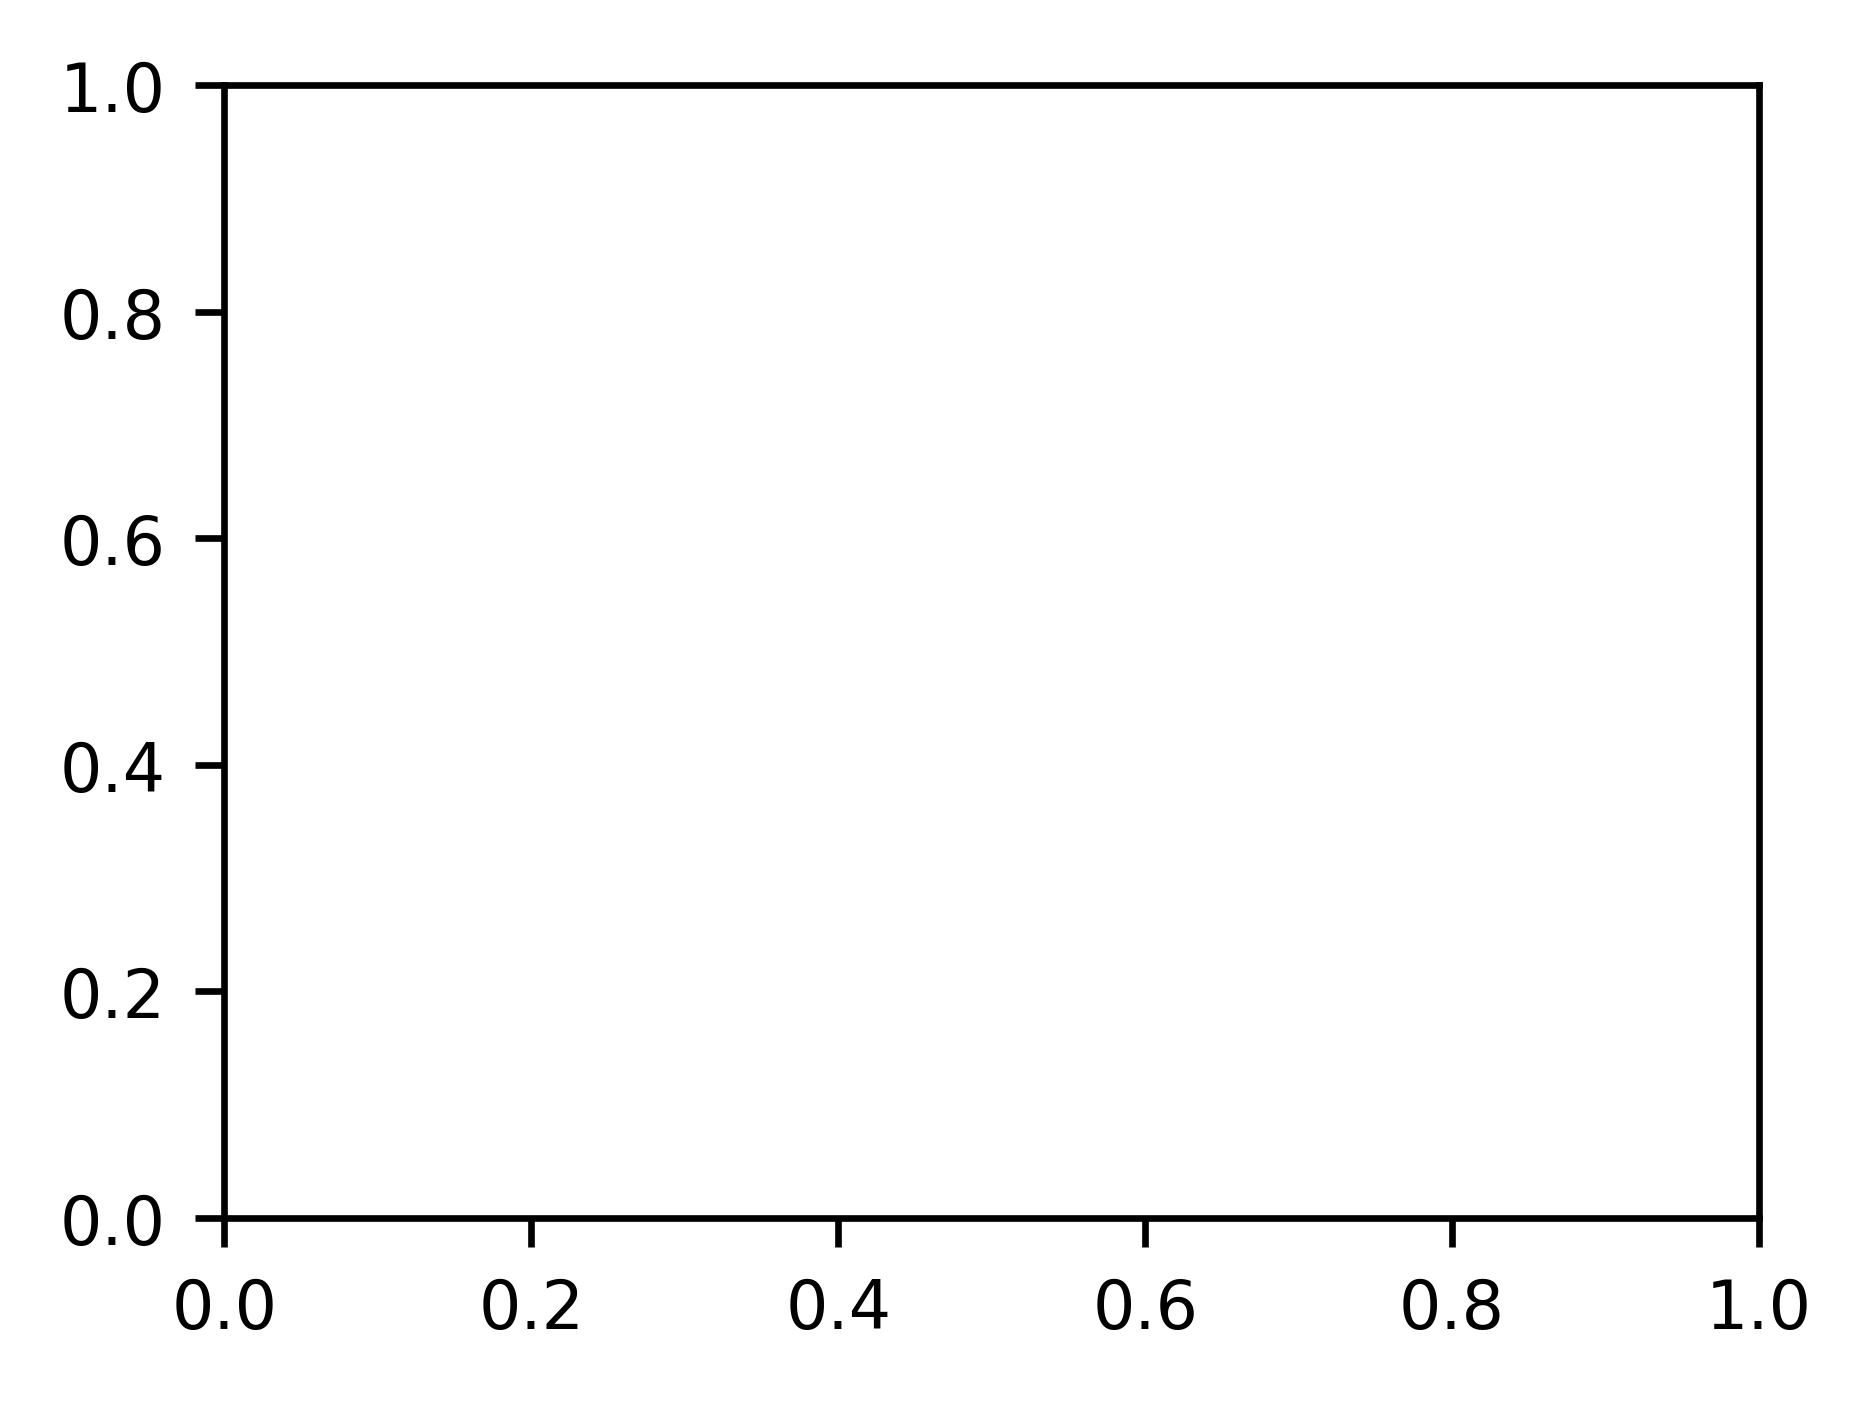

In [ ]:

fig_size= (5.5, 4)
fig = plt.figure(figsize=fig_size)
fig.set_dpi(150)
learner= "MetaSGD"
names = [
#     "targ_mem_center/awgn_wide_" +learner.lower()+ "_15ts_5cls_v2",
#     "targ_mem_center/bursty_hard_wide_" +learner.lower()+ "_15ts_5cls_v2",
#      "targ_mem_center/mem_hard_wide_" +learner.lower()+ "_15ts_5cls_v2",
#     "targ_mem_center/mp_hard_wide_" +learner.lower()+ "_15ts_5cls_v2",
#     "targ_mem_center/mix_hard_wide_" +learner.lower()+ "_15ts_5cls_v2",

    "_center/awgn_wide_" +learner.lower()+ "_15ts_5cls_v2",
    "_center/bursty_hard_wide_" +learner.lower()+ "_15ts_5cls_v2",
    "_center/mem_hard_wide_" +learner.lower()+ "_15ts_5cls_v2",
    "_center/mp_hard_wide_" +learner.lower()+ "_15ts_5cls_v2",
    "_center/mix_hard_wide_" +learner.lower()+ "_15ts_5cls_v2",
    
#     "targ_mp_center/awgn_wide_" +learner.lower()+ "_15ts_5cls_v2",
#     "targ_mp_center/bursty_hard_wide_" +learner.lower()+ "_15ts_5cls_v2",
#     "targ_mp_center/mem_hard_wide_" +learner.lower()+ "_15ts_5cls_v2",
#     "targ_mp_center/mp_hard_wide_" +learner.lower()+ "_15ts_5cls_v2",
#     "targ_mp_center/mix_hard_wide_" +learner.lower()+ "_15ts_5cls_v2",

]
    
# targs= ["bursty"]
targs = ["awgn", "bursty", "mem" , "mp"]

offset = 0.05
targ_cka_classifier = dict()
targ_cka_features = dict()

cka_mean_msgd, cka_std_msgd = [], []

for targ_id, target in enumerate(targs):
    
    print(target)
    targ_cka_classifier[target], targ_cka_features[target] = [],[]
#     plt.figure()
    
    for name in names:
        path_before = "../activations/targ_"+target + name +"_before.pickle"
        path_after = "../activations/targ_"+target + name +"_after.pickle"

        source_channel = name.split('/')[1].split('_')[0]
        if source_channel == target:
            continue
        with open(path_before, 'rb') as f:
            acts1 = pickle.load(f)

        with open(path_after, 'rb') as f:
            acts2 = pickle.load(f)

        cka_all, cca_all = [], []
        for layer_key in acts1.keys():
    #         print(layer_key)


    #         print(acts1.keys())
            print(acts1[layer_key].cpu().detach().numpy().shape)

            cka_layer, cca_layer = [], []
            for act_id in range(3750):
    #             if act_id<1500: continue
                if layer_key != "module.classifier":
                    avg_acts1 = np.mean(acts1[layer_key][act_id].cpu().detach().numpy(), axis=(1,2))
                    avg_acts2 = np.mean(acts2[layer_key][act_id].cpu().detach().numpy(), axis=(1,2))
                else:
                    avg_acts1 = acts1[layer_key][act_id].cpu().detach().numpy()
                    avg_acts2 = acts2[layer_key][act_id].cpu().detach().numpy()

    #             print(avg_acts1.shape, avg_acts2.shape)
                cka_act = feature_space_linear_cka(avg_acts1, avg_acts2)
    #             print(cka_act)
    #             cca_act = cca(avg_acts1, avg_acts2)

                cka_layer.append(cka_act)
    #             cca_layer=cca_layer.append(cca_act)

            # print('Linear CKA from Examples: {:.5f}'.format(cka_from_examples))
    #         print('Linear CKA from Features: {:.5f}'.format(cka_from_features))
            cka_all.append(cka_layer)
    #         cca_all.append(cca_layer)

        targ_cka_classifier[target].append(np.mean(cka_layer))
        targ_cka_features[target].append(np.mean(cka_all[:4]))# feature only
        
        
        cka_mean_msgd.append(np.mean(cka_all, axis=1))
        cka_std_msgd.append(np.std(cka_all, axis=1))
        
#         print(name[15:26], " source mean cka", np.mean(cka_all), " classifier cka",  np.mean(cka_layer))
        print(name[15:26], " source mean cka", np.mean(cka_all[:4]), " classifier cka",  np.mean(cka_layer))
        plt.errorbar(np.arange(len(cka_all))-0.05+offset*targ_id, np.mean(cka_all, axis=1), yerr=np.std(cka_all, axis=1), ls='none', label=source_channel)
        plt.scatter(np.arange(len(cka_all))-0.05+offset*targ_id, np.mean(cka_all, axis=1), alpha=0.8, s=80)
    # plt.scatter(range(len(cca_all)), cca_all)
    
    plt.title(learner, fontsize=subplot_fontsize)
    plt.xlabel("Layers", fontsize=subplot_fontsize)
    plt.ylabel("CKA", fontsize=subplot_fontsize)
#     plt.legend()
    plt.xticks(np.arange(5), ["Conv. 0","Conv. 1","Conv. 2","Conv. 3", "Classifier"],  fontsize=subplot_fontsize, rotation=30)
    plt.yticks(fontsize=subplot_fontsize)
    
#mem awgn mix mp bursty
#awgn mp mix mem bursty
#mp awgn mix mem bursty

[array([0.99999829, 0.98773243, 0.98458654, 0.84793561, 0.11463761]), array([0.9995805 , 0.99975184, 0.99357578, 0.75739506, 0.11887295]), array([0.95197726, 0.99280322, 0.95364832, 0.76068371, 0.16595847]), array([0.99992103, 0.83978165, 0.59721047, 0.84459551, 0.12786238]), array([0.98549086, 0.99834362, 0.95678062, 0.72542583, 0.10320242]), array([0.99964377, 0.99976157, 0.99652188, 0.8036345 , 0.14384068]), array([0.95545541, 0.99272062, 0.96403954, 0.77892925, 0.15644566]), array([0.99998116, 0.9764803 , 0.91278461, 0.90306778, 0.10712002]), array([0.99200342, 0.99859654, 0.96205313, 0.65715291, 0.1398652 ]), array([0.99999816, 0.9894197 , 0.98404634, 0.84051127, 0.11175405]), array([0.93724512, 0.99178405, 0.95654786, 0.7402185 , 0.11186034]), array([0.99992168, 0.85459473, 0.61510318, 0.85126158, 0.13424906]), array([0.98572822, 0.998298  , 0.95661787, 0.65175822, 0.1585892 ]), array([0.99999798, 0.98754091, 0.98385096, 0.83684596, 0.11505777]), array([0.99956194, 0.99969512, 0.

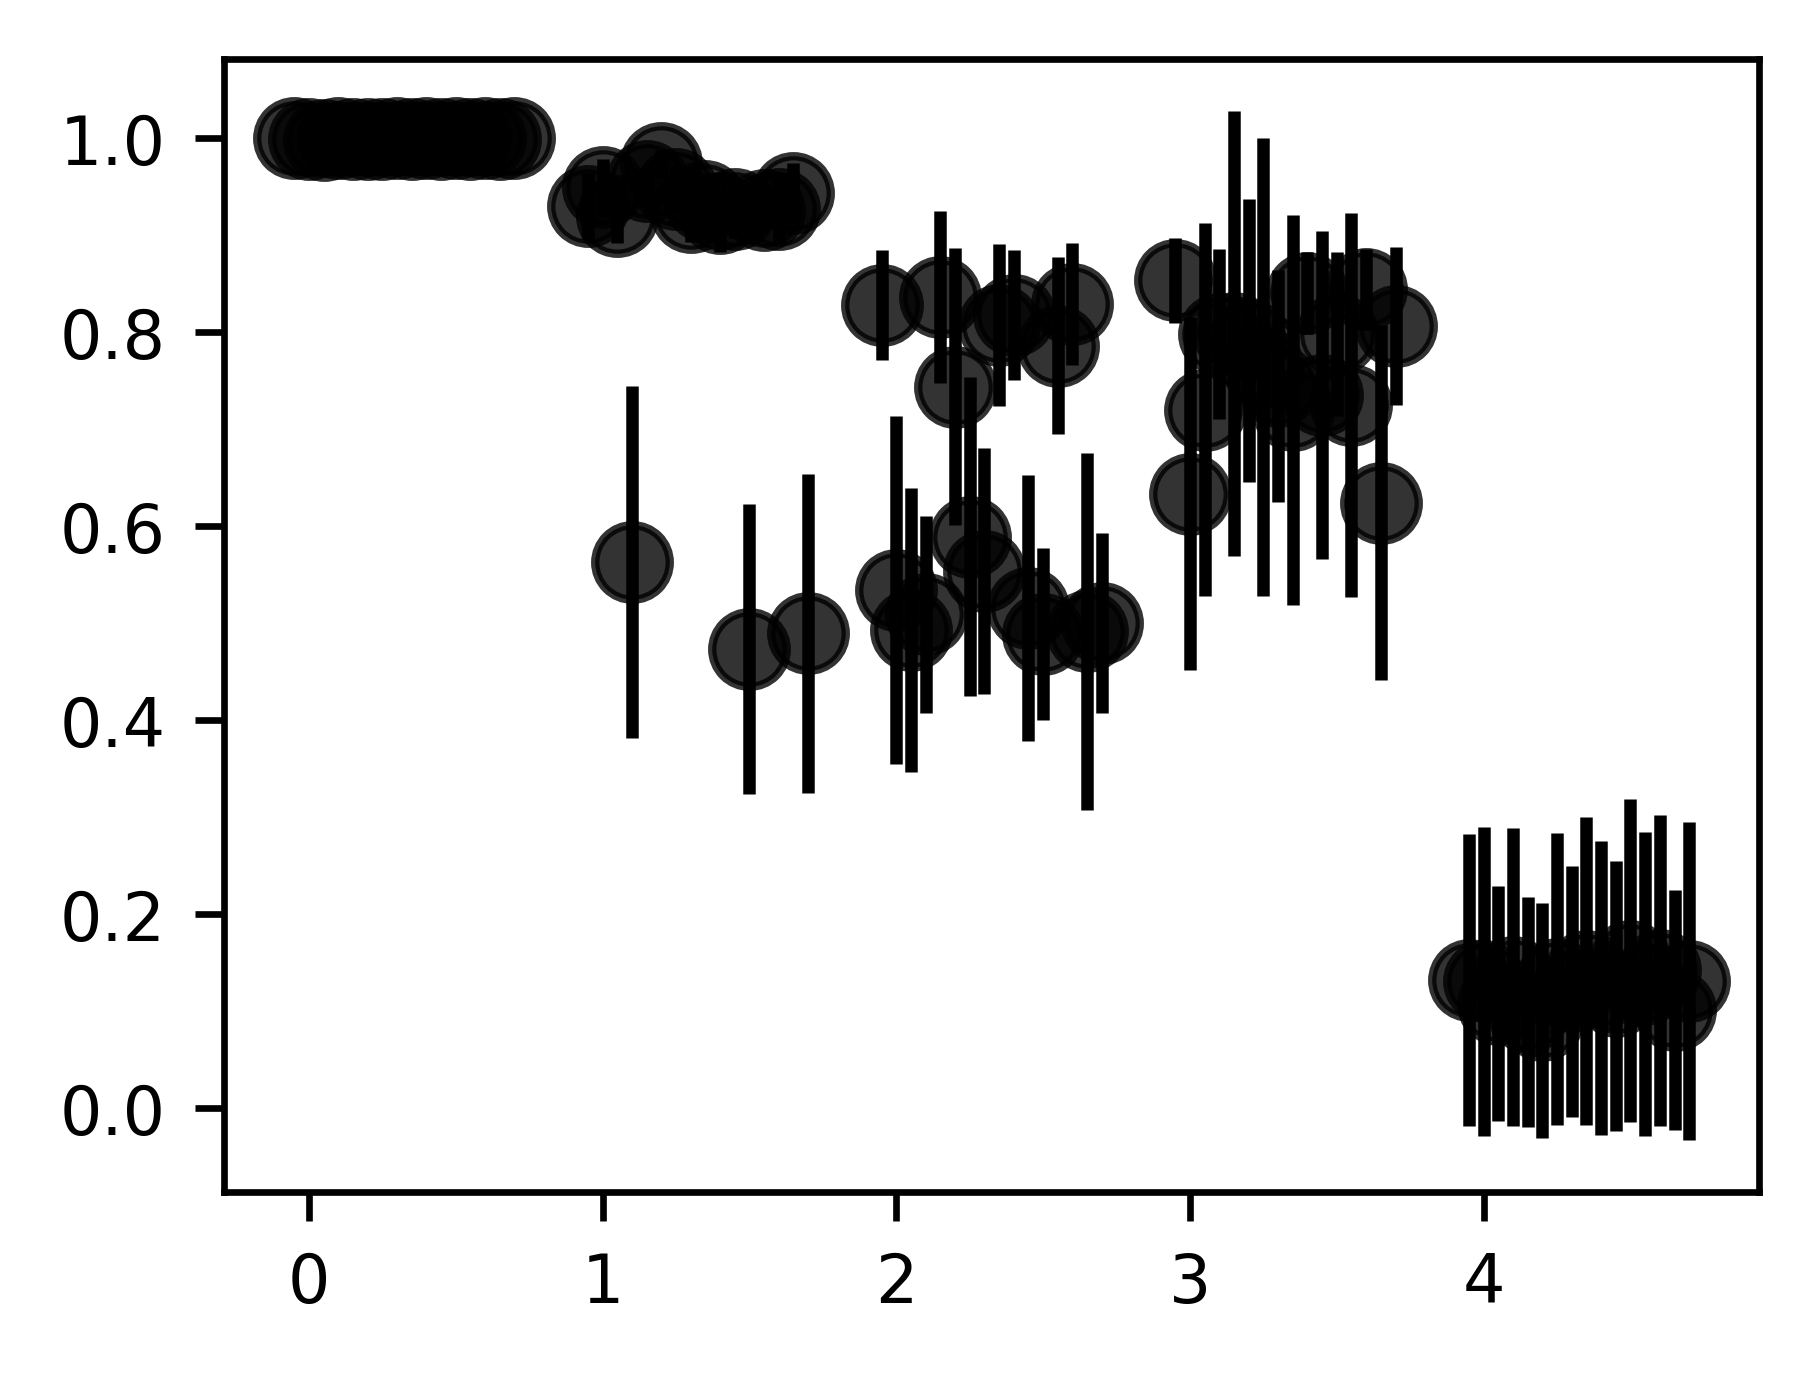

In [48]:
print(cka_mean_maml)
for i in range(len(cka_mean_maml)):
    print(i, cka_mean_maml[i])
    plt.errorbar(np.arange(len(cka_mean_msgd[i]))-0.05+offset*i, cka_mean_msgd[i], yerr=cka_std_msgd[i], ls='none'\
                ,mfc='black', mec='black',ecolor='black')
    
    plt.scatter(np.arange(len(cka_mean_msgd[i]))-0.05+offset*i, cka_mean_msgd[i], label=source_channel, alpha=0.8, s=80, c='black')


(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

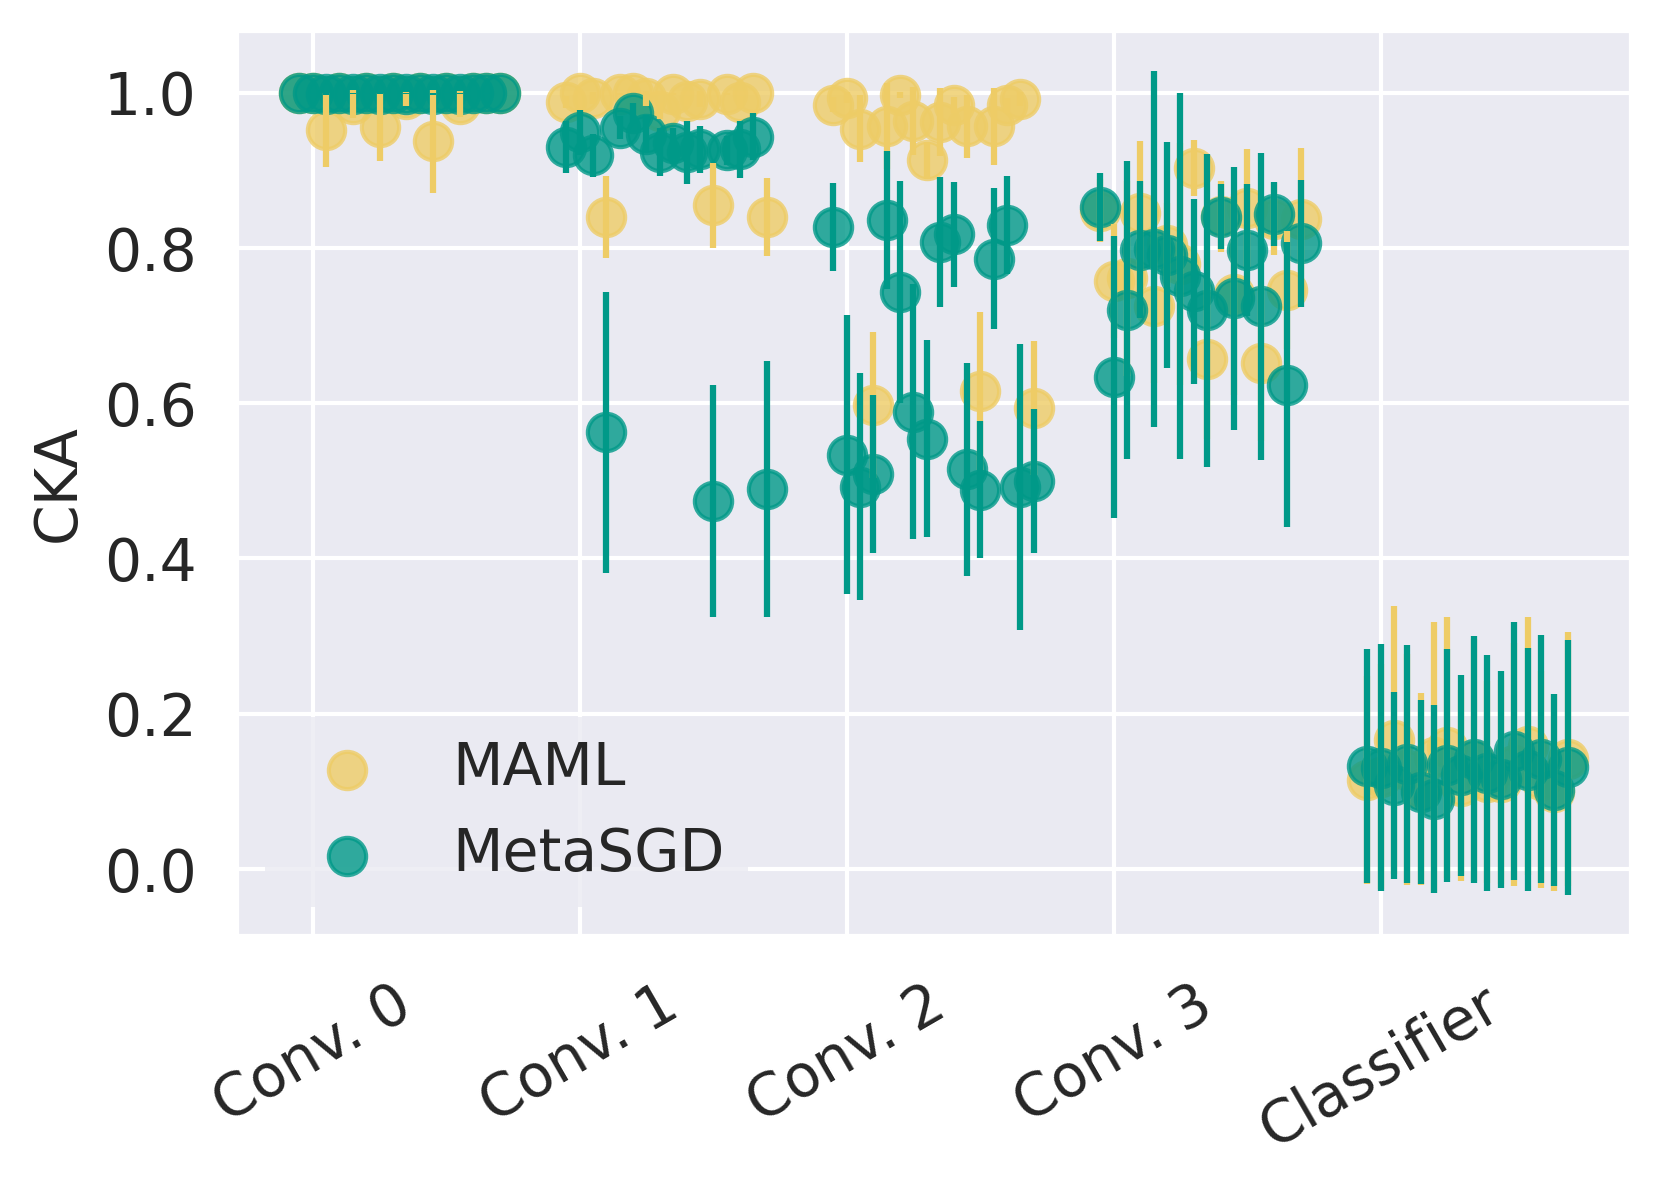

In [71]:

fig_size= (6, 4)
fig = plt.figure(figsize=fig_size)
fig.set_dpi(300)
# print(cka_mean_msgd)
col2 = "#009988"
col1= "#EECC66"#"#DDDDDD"

# print(cka_mean_maml)
for i in range(len(cka_mean_maml)):
#     print(i, cka_mean_maml[i])
    plt.errorbar(np.arange(len(cka_mean_maml[i]))-0.05+offset*i, cka_mean_maml[i], yerr=cka_std_maml[i], ls='none'\
                ,mfc=col1, mec=col1,ecolor=col1)
    if i == 0:
        plt.scatter(np.arange(len(cka_mean_maml[i]))-0.05+offset*i, cka_mean_maml[i], label="MAML", alpha=0.8, s=80, c=col1)
    else:
        plt.scatter(np.arange(len(cka_mean_maml[i]))-0.05+offset*i, cka_mean_maml[i], alpha=0.8, s=80, c=col1)

    
for i in range(len(cka_mean_msgd)):
#     print(i, cka_mean_msgd[i])
    plt.errorbar(np.arange(len(cka_mean_msgd[i]))-0.05+offset*i, cka_mean_msgd[i], yerr=cka_std_msgd[i], ls='none'\
                ,mfc=col2, mec=col2,ecolor=col2)
    
    if i == 0:
        plt.scatter(np.arange(len(cka_mean_msgd[i]))-0.05+offset*i, cka_mean_msgd[i], label="MetaSGD", alpha=0.8, s=80, c=col2)
    else:
        plt.scatter(np.arange(len(cka_mean_msgd[i]))-0.05+offset*i, cka_mean_msgd[i], alpha=0.8, s=80, c=col2)
# plt.xlabel("Layers", fontsize=subplot_fontsize)
plt.ylabel("CKA", fontsize=14)
plt.legend( fontsize=14,edgecolor='none')
plt.xticks(np.arange(5), ["Conv. 0","Conv. 1","Conv. 2","Conv. 3", "Classifier"],  fontsize=14, rotation=30)
plt.yticks(fontsize=14)

../pack1123/awgn_wide_maml_15ts_5cls*json


NameError: name 'glob' is not defined

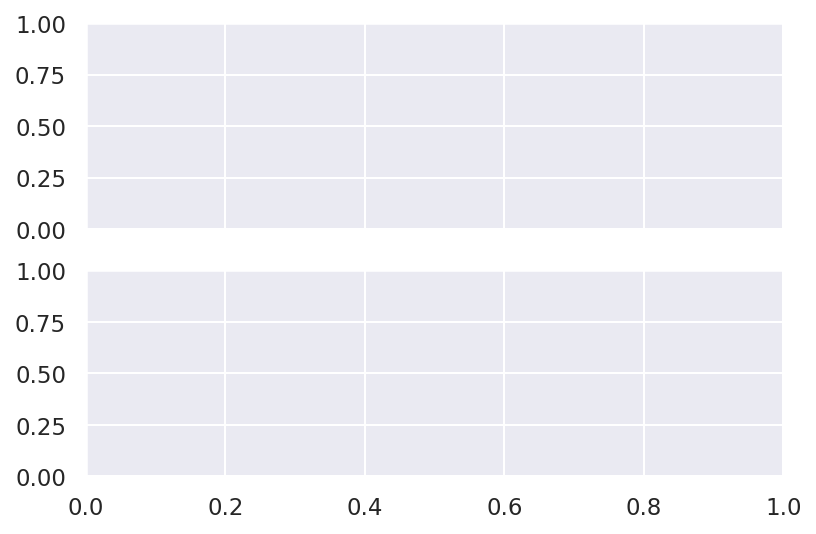

In [64]:
import seaborn as sns
sns.set()

fig,(ax1,ax2) = plt.subplots(2, 1,sharex=True, figsize=(6,4))
fig.set_dpi(150)
axes = [ax1,ax2]

linestyles = ["dotted","solid", "-"]

learners = ["MAML", "MAML_FO", "Reptile", "CAVIA", "ANIL", "KFO", "BOIL", "MetaSGD", "MetaCurvature",]   

labels = ["MAML", "MAML FO", "Reptile", "CAVIA", "ANIL", "KFO", "BOIL", "MetaSGD", "MetaCurv.",]   
targ_channel = "awgn"

y_min, y_max = 0.0008, 0.3

channel_hardness = ["awgn"]

offsets = np.arange(-0.3,0.6,0.1)

for i, learner in enumerate(learners):
    all_v = []
    all_std = []
    
    if learner.lower() == "boil":
        print("here")
        run_names = [
    "../pack1123/awgn_wide_" +learner.lower()+ "_15ts_5cls"+ "*json",
    "../pack0shot/awgn_wide_" +learner.lower()+ "_15ts_5cls*.json"]
    else: 
        run_names = [
    "../pack1123/awgn_wide_" +learner.lower()+ "_15ts_5cls"+ "*json",
    "../pack0shot/awgn_wide_" +learner.lower()+ "_0shot_15ts_5cls*.json"]

    for j, run_name in enumerate(run_names):
        print(run_name)

        run_name = glob.glob(run_name)
        if debug: print("glob ", run_name[0], type(run_name))
        data = load_from_json(run_name[0])


        if debug: print( data["iter"], run_name)
        value = data['val_ber_list']

        if learner is "test" or "boil":
            ep_id = -1
        else: 
            ep_id =  np.where(np.asarray(data["iter"])== total_it)[0][0] 
        if debug: print("value shape", np.shape(value), np.mean(value), " ep id ", ep_id)


        if targ_channel == "awgn":
            if debug: print(len(value))
            value = np.asarray(value[ep_id][:1050]).reshape(len(snr_list_awgn), -1)
            v_id = 10

        elif targ_channel == "bursty":
            value = np.asarray(value[ep_id][1950:]).reshape(len(snr_list_bursty), -1)
            v_id = 4

        elif targ_channel == "mem":
            value = np.asarray(value[ep_id][1050:1500]).reshape(len(snr_list_mem), -1)
            v_id = 4
#                 y_min = 0.0001
        elif targ_channel == "mp":
            value = np.asarray(value[ep_id][1500:1950]).reshape(len(snr_list_mp), -1)
            v_id = 4

        if debug: print("value shape", np.shape(value), np.mean(value[v_id]))

        all_v.append(np.mean(value[v_id]))

        all_std.append(np.std(value[v_id]))

    ls_id = 0
    print(all_v)
    # plot adapt
    eb = ax2.errorbar(offsets[i], all_v[0], yerr = all_std[0], lw=0, \
          elinewidth = 3., capsize=8.2, capthick=2, alpha = 0.9,  ecolor= colour[i], linestyle = linestyles[ls_id])
    eb[-1][0].set_linestyle(linestyles[ls_id])

    ax2.scatter(offsets[i], all_v[0],marker=markers[i], #label = legends[i],  \
                s=60, alpha=0.9,  c = colour[i])
    ax2.set_ylabel("BER \n Adapted Model")
#         plt.xticks(ticks=np.arange(-0.3, 0.5, 0.1))
    # plot zeroshot
    ls_id = 1
    eb = ax1.errorbar(offsets[i], all_v[1], yerr = all_std[1], lw=0, \
          elinewidth = 3., capsize=8.2, capthick=2, alpha = 0.9,  ecolor= colour[i], linestyle = linestyles[ls_id])
    eb[-1][0].set_linestyle(linestyles[ls_id])

    ax1.scatter(offsets[i], all_v[1],marker=markers[i], #label = legends[i],  \
                s=60, alpha=0.9,  c = colour[i])

    ax1.set_ylabel("BER \n Base Model")
    plt.setp(axes, xticks=offsets)
    plt.sca(ax2)       
    plt.xticks(ticks=offsets, labels=labels, rotation=30)

    fig.align_ylabels(axes)

    plt.yscale('log')
#         fig.tight_layout()


In [ ]:

fig_size= (5.5, 4)
fig = plt.figure(figsize=fig_size)
fig.set_dpi(150)
learner= "MAML"
names = [
#     "targ_mem_center/awgn_wide_" +learner.lower()+ "_15ts_5cls_v2",
#     "targ_mem_center/bursty_hard_wide_" +learner.lower()+ "_15ts_5cls_v2",
#      "targ_mem_center/mem_hard_wide_" +learner.lower()+ "_15ts_5cls_v2",
#     "targ_mem_center/mp_hard_wide_" +learner.lower()+ "_15ts_5cls_v2",
#     "targ_mem_center/mix_hard_wide_" +learner.lower()+ "_15ts_5cls_v2",

    "_center/awgn_wide_" +learner.lower()+ "_15ts_5cls_v2",
    "_center/bursty_hard_wide_" +learner.lower()+ "_15ts_5cls_v2",
    "_center/mem_hard_wide_" +learner.lower()+ "_15ts_5cls_v2",
    "_center/mp_hard_wide_" +learner.lower()+ "_15ts_5cls_v2",
    "_center/mix_hard_wide_" +learner.lower()+ "_15ts_5cls_v2",
    
#     "targ_mp_center/awgn_wide_" +learner.lower()+ "_15ts_5cls_v2",
#     "targ_mp_center/bursty_hard_wide_" +learner.lower()+ "_15ts_5cls_v2",
#     "targ_mp_center/mem_hard_wide_" +learner.lower()+ "_15ts_5cls_v2",
#     "targ_mp_center/mp_hard_wide_" +learner.lower()+ "_15ts_5cls_v2",
#     "targ_mp_center/mix_hard_wide_" +learner.lower()+ "_15ts_5cls_v2",

]
    
# targs= ["bursty"]
targs = ["awgn", "bursty", "mem" , "mp"]

offset = 0.05
targ_cka_classifier = dict()
targ_cka_features = dict()
for targ_id, target in enumerate(targs):
    
    print(target)
    targ_cka_classifier[target], targ_cka_features[target] = [],[]
#     plt.figure()
    
    for name in names:
        path_before = "../activations/targ_"+target + name +"_before.pickle"
        path_after = "../activations/targ_"+target + name +"_after.pickle"

        source_channel = name.split('/')[1].split('_')[0]
        if source_channel == target:
            continue
        with open(path_before, 'rb') as f:
            acts1 = pickle.load(f)

        with open(path_after, 'rb') as f:
            acts2 = pickle.load(f)

        cka_all, cca_all = [], []
        for layer_key in acts1.keys():
    #         print(layer_key)


    #         print(acts1.keys())
            print(acts1[layer_key].cpu().detach().numpy().shape)

            cka_layer, cca_layer = [], []
            for act_id in range(3750):
    #             if act_id<1500: continue
                if layer_key != "module.classifier":
                    avg_acts1 = np.mean(acts1[layer_key][act_id].cpu().detach().numpy(), axis=(1,2))
                    avg_acts2 = np.mean(acts2[layer_key][act_id].cpu().detach().numpy(), axis=(1,2))
                else:
                    avg_acts1 = acts1[layer_key][act_id].cpu().detach().numpy()
                    avg_acts2 = acts2[layer_key][act_id].cpu().detach().numpy()

    #             print(avg_acts1.shape, avg_acts2.shape)
                cka_act = feature_space_linear_cka(avg_acts1, avg_acts2)
    #             print(cka_act)
    #             cca_act = cca(avg_acts1, avg_acts2)

                cka_layer.append(cka_act)
    #             cca_layer=cca_layer.append(cca_act)

            # print('Linear CKA from Examples: {:.5f}'.format(cka_from_examples))
    #         print('Linear CKA from Features: {:.5f}'.format(cka_from_features))
            cka_all.append(cka_layer)
    #         cca_all.append(cca_layer)

        targ_cka_classifier[target].append(np.mean(cka_layer))
        targ_cka_features[target].append(np.mean(cka_all[:4]))# feature only
#         print(name[15:26], " source mean cka", np.mean(cka_all), " classifier cka",  np.mean(cka_layer))
        print(name[15:26], " source mean cka", np.mean(cka_all[:4]), " classifier cka",  np.mean(cka_layer))
        plt.errorbar(np.arange(len(cka_all))-0.05+offset*targ_id, np.mean(cka_all, axis=1), yerr=np.std(cka_all, axis=1), ls='none', label=source_channel)
        plt.scatter(np.arange(len(cka_all))-0.05+offset*targ_id, np.mean(cka_all, axis=1), alpha=0.8, s=80)
    # plt.scatter(range(len(cca_all)), cca_all)
    
    plt.title(learner, fontsize=subplot_fontsize)
    plt.xlabel("Layers", fontsize=subplot_fontsize)
    plt.ylabel("CKA", fontsize=subplot_fontsize)
    
#     plt.legend()
    plt.xticks(np.arange(5), ["Conv. 0","Conv. 1","Conv. 2","Conv. 3", "Classifier"],  fontsize=subplot_fontsize, rotation=30)
    plt.yticks(fontsize=subplot_fontsize)
    
#mem awgn mix mp bursty
#awgn mp mix mem bursty
#mp awgn mix mem bursty

In [ ]:
#Shift (Figure 7 Across Family). Order: awgn-bursty-mem-mp-mixed (training)
AWGN_shift = [-2.03479259, 7.6138539,  2.35153803, 0.69821692, 1.10275053]
bursty_shift= [ 7.6138539, -2.97433989, 9.90015855, 6.81600768, 5.20918333]
mem_shift= [ 2.35153803, 9.90015855, -2.3325577,  2.9772281,  1.97443182]
mp_shift= [ 0.69821692, 6.81600768, 2.9772281, -2.06162308, 1.17404687]

allshifts = [AWGN_shift, bursty_shift, mem_shift, mp_shift]

markers = ["+", "<", "*", "^", "o"]
for i, shifts in enumerate(allshifts):
    
    for s, shift in enumerate(shifts):
#         print(s, i)
        plt.scatter(shift, i, marker= markers[s])
        
plt.xlabel ("shift score")
plt.ylabel ("target channel fam")
plt.title("--awgn-bursty-mem-mp-mixed (training)-->")
plt.legend()
plt.yticks(np.arange(0, 4), ["awgn", "bursty", "mem", "MP"] )

In [ ]:
targ_distance_dict = dict()
targ_distance_dict["awgn"] = [7.6138539,  2.35153803, 0.69821692, 1.10275053]
targ_distance_dict["bursty"] = [ 7.6138539, 9.90015855, 6.81600768, 5.20918333]
targ_distance_dict["mem"] = [ 2.35153803, 9.90015855,  2.9772281,  1.97443182]
targ_distance_dict["mp"] = [ 0.69821692, 6.81600768, 2.9772281,  1.17404687]

x, y = [], []

for target in targs:
    
    plt.scatter(targ_distance_dict[target], targ_cka_features[target], label="Target "+target.upper())

    x.extend(targ_distance_dict[target])
    y.extend(targ_cka_features[target])
plt.xlabel("Distance Score")
plt.ylabel("CKA Feature")
# plt.xlim(0, 10)
plt.legend()

x = np.asarray(x)
y = np.asarray(y)
x = x[:, None]
y = y[:, None]
# print(x, y)
from sklearn.linear_model import LinearRegression
# X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
# >>> y = np.dot(X, np.array([1, 2])) + 3
reg = LinearRegression().fit(x, y)
x_in = np.arange(11)
x_in = x_in[:,None]
y_pred = reg.predict(x_in)
plt.plot(y_pred)

In [ ]:
# targ_distance_dict = dict()
# targ_distance_dict["awgn"] = [-2.03479259, 7.6138539,  2.35153803, 0.69821692, 1.10275053]
# targ_distance_dict["bursty"] = [ 7.6138539, -2.97433989, 9.90015855, 6.81600768, 5.20918333]
# targ_distance_dict["mem"] = [ 2.35153803, 9.90015855, -2.3325577,  2.9772281,  1.97443182]
# targ_distance_dict["mp"] = [ 0.69821692, 6.81600768, 2.9772281, -2.06162308, 1.17404687]

x, y = [], []
for target in targs:
    
    plt.scatter(targ_distance_dict[target], targ_cka_classifier[target], label="Target "+target.upper())
    x.extend(targ_distance_dict[target])
    y.extend(targ_cka_classifier[target])
#     for s, shift in enumerate(AWGN_shift):
# #         print(s, i)
#         plt.scatter(shift, targ_awgn_cka_classifier[s], marker= markers[s])
plt.xlabel("Distance Score")
plt.ylabel("CKA Classifier")
plt.xlim(0, 10)
plt.legend()

x = np.asarray(x)
y = np.asarray(y)
x = x[:, None]
y = y[:, None]
# print(x, y)
from sklearn.linear_model import LinearRegression
# X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
# >>> y = np.dot(X, np.array([1, 2])) + 3
reg = LinearRegression().fit(x, y)
x_in = np.arange(11)
x_in = x_in[:,None]
y_pred = reg.predict(x_in)
plt.plot(y_pred)

In [ ]:
#Shift (Figure 7 Across Family). Order: awgn-bursty-mem-mp-mixed (training)
AWGN_shift = [-2.03479259, 7.6138539,  2.35153803, 0.69821692, 1.10275053]
bursty_shift= [ 7.6138539, -2.97433989, 9.90015855, 6.81600768, 5.20918333]
mem_shift= [ 2.35153803, 9.90015855, -2.3325577,  2.9772281,  1.97443182]
mp_shift= [ 0.69821692, 6.81600768, 2.9772281, -2.06162308, 1.17404687]

allshifts = [AWGN_shift, bursty_shift, mem_shift, mp_shift]

markers = ["+", "<", "*", "^", "o"]
for i, shifts in enumerate(allshifts):
    
    for s, shift in enumerate(shifts):
#         print(s, i)
        plt.scatter(shift, i, marker= markers[s])
        
plt.xlabel ("shift score")
plt.ylabel ("target channel fam")
plt.title("--awgn-bursty-mem-mp-mixed (training)-->")
plt.legend()
plt.yticks(np.arange(0, 4), ["awgn", "bursty", "mem", "MP"] )

In [ ]:
cka_from_examples = cka(gram_linear(avg_acts1), gram_linear(avg_acts2))


In [ ]:
rbf_cka = cka(gram_rbf(avg_acts1, 0.5), gram_rbf(avg_acts2, 0.5))

# Real data

In [ ]:
import scipy.io as sio
in_mat = sio.loadmat("../datasets/DataIn.mat")['DataIn']
print(type(in_mat), np.shape(in_mat))
out_mat = sio.loadmat("../datasets/DataOut.mat")['DataOut']
print(type(out_mat), np.shape(out_mat))
# print(out_mat[1])

In [ ]:
selected = np.random.choice(len(out_mat), 10)
print(selected)

In [ ]:
a = np.arange(1000)
print(a[selected])

In [ ]:

a = np.reshape(out_mat[selected, :2500], (-1, 50, 10, 2))
print(np.shape(a), a[0][0][0][0])
type(a[0][0][0][0])

In [ ]:
in_mat = sio.loadmat("../datasets/DataIn.mat")['DataIn']
in_mat = np.reshape(in_mat[:1000, :250], (-1, 50, 50, 10, 2))
print(np.shape(in_mat))
# print(in_mat)

print(np.where(in_mat==1))
# np.reshape(out_mat, (46464, 50, 10,2))
# np.ndarray.astype(in_mat, float32)
in_mat = np.float32(in_mat)
type(in_mat[0][0][0][0])
print(in_mat[0][0][0][0])

In [ ]:

data1 = load_from_json("../pack1123/bursty_hard_wide_reptile_15ts_5cls_v2.json")['val_ber_list'][-1]
print(np.mean(data1))
print(np.shape(data1))
data2 = load_from_json("../results/test/synth/bursty_hard_wide_reptile_15ts_5cls_v2.json")['val_ber_list'][0]

# print(np.shape(data2[0]
#               ))
# print(np.mean(data2))
plt.plot(data1, label="synth")
# plt.figure()
plt.plot(data2, label="real data")
plt.legend()

In [ ]:
data1 = load_from_json("../pack1123/bursty_hard_mid_low_boil_15ts_5cls_v2.json")['val_ber_list'][-1]
print(np.mean(data1))
print(np.shape(data1))

# data1 = load_from_json("../pack1123/mem_hard_wide_maml_15ts_5cls_v2.json")['val_ber_list'][-1]
data2 = load_from_json("../results/test/synth/mem_hard_wide_boil_15ts_5cls_v2.json")['val_ber_list'][-1]

# print(np.shape(data2[0]
#               ))
# print(np.mean(data2))
plt.plot(data1, label="synth")
# plt.figure()
plt.plot(data2, label="real data")
plt.legend()
# data2 = load_from_json("../results/test/synth/bursty_hard_wide_boil_15ts_5cls_v2.json")['val_ber_list'][0]


In [ ]:
data1 = load_from_json("../pack1123/bursty_hard_wide_kfo_15ts_5cls_v1.json")['val_ber_list'][-1]
print(np.mean(data1))
print(np.shape(data1))
data2 = load_from_json("../results/test/synth/bursty_hard_wide_kfo_15ts_5cls_v1.json")['val_ber_list'][0]

# print(np.shape(data2[0]
#               ))
# print(np.mean(data2))
plt.plot(data1, label="synth")
# plt.figure()
plt.plot(data2, label="real data")
plt.legend()


In [ ]:
# load_from_json("results/")
# data0 = load_from_json("../pack1123/awgn_narrow_maml_15ts_5cls_v2.json")['val_ber_list'][-1][:1050]
# print(np.mean(data0))
data1 = load_from_json("../pack1123/mix_hard_wide_maml_15ts_5cls_v2.json")['val_ber_list'][-1][:1050]
print(np.mean(data1))
data2 = load_from_json("../results/test/realdata/awgn_wide_maml_15ts_5cls_v2.json")['val_ber_list'][0]
print(np.mean(data2))

plt.scatter(range(len(data1)), data1, label="synth")
# plt.figure()

newl = []
for i in data2:
    if i != 1: 
#         print(i)
        newl.append(i)
plt.scatter(range(len(newl)), newl, label="real data")
plt.legend()

In [ ]:

data2 = load_from_json("../results/test/realdata64/awgn_wide_maml_15ts_5cls_v2.json")['val_ber_list'][0]
print(np.mean(data2))

plt.scatter(range(len(data2)), data2, label="real data v1")

data3 = load_from_json("../results/test/realdata64_v2/awgn_wide_maml_15ts_5cls_v2.json")['val_ber_list'][0]
print(np.mean(data3))
plt.scatter(range(len(data3)), data3, label="real data v2")
plt.legend()

In [ ]:

data1 = load_from_json("../pack1123/awgn_wide_maml_15ts_5cls_v2.json")['val_ber_list'][-1][:1050]
print(np.mean(data1))
data1 = np.reshape(data1, (21, 50))
plt.errorbar(range(len(data1)), np.mean(data1, axis=1), yerr=np.std(data1, axis=1), label="synthetic data")


data2 = load_from_json("../results/test/realdata64_v2/awgn_wide_maml_15ts_5cls_v2.json")['val_ber_list'][0]

plt.errorbar(10+0.1, np.mean(data2), yerr=np.std(data3), label="real data 64QAM")
plt.scatter(10+0.1, np.mean(data2), label="real data 64QAM")


plt.xlim(8.5, 11.5)
plt.ylim(0, 0.1)
plt.legend()

In [ ]:

data1 = load_from_json("../pack1123/bursty_hard_wide_maml_15ts_5cls_v2.json")['val_ber_list'][-1][1950:]
print(np.mean(data1))
data1 = np.reshape(data1, (11, 50))

plt.errorbar(range(len(data1)), np.mean(data1, axis=1), yerr=np.std(data1, axis=1), label="synthetic data")
# plt.figure()
data3 = load_from_json("../results/test/realdata64_v2/bursty_hard_narrow_maml_15ts_5cls_v2.json")['val_ber_list'][0]

plt.errorbar(10+0.2, np.mean(data3), yerr=np.std(data3), label="real data 64QAM")
plt.scatter(10+0.2, np.mean(data3), label="real data 64QAM v2")
# newl = []
# for i in data2:
#     if i != 1: 
# #         print(i)
#         newl.append(i)
# plt.errorbar(10+0.1, np.mean(newl), yerr=np.std(newl), label="real data")
# plt.scatter(10+0.1, np.mean(newl))


data2 = load_from_json("../results/test/realdata64/bursty_hard_narrow_maml_15ts_5cls_v2.json")['val_ber_list'][0]

plt.errorbar(10+0.1, np.mean(data2), yerr=np.std(data3), label="real data 64QAM")
plt.scatter(10+0.1, np.mean(data2), label="real data 64QAM")


plt.xlim(8.5, 11.5)
# plt.ylim(0, 0.1)
plt.legend()

In [ ]:
data2 = load_from_json("../results/test/realdata64_v1/bursty_hard_wide_maml_15ts_5cls_v2.json")['val_ber_list']#[0][:1050]
print(len(data2))

In [ ]:

data1 = load_from_json("../pack1123/awgn_wide_maml_15ts_5cls_v2.json")['val_ber_list'][-1][:1050]
plt.plot(data1, label="train test")
plt.figure()
data1 = np.reshape(data1, (21, 50))
plt.errorbar(range(21), np.mean(data1, axis=1), yerr=np.std(data1, axis=1), label="train test")
data2 = load_from_json("../results/test/maml_dbg.json")['val_ber_list'][0][:1050]
data2 = np.reshape(data2, (21, 50))
plt.errorbar(range(21), np.mean(data2, axis=1), yerr=np.std(data2, axis=1), label="train test")



In [ ]:


a = np.arange(1050)
a = np.reshape(a, (21, 50))
print(a)
print( np.mean(a, axis=1))

In [ ]:
a = [0, 1, 2, 3, 4, 5]* 5
a = np.asarray(np.sort(a))
a = np.reshape(a, (6, 5))
a

In [ ]:
a = [0, 1, 2, 3, 4, 5]* 5

print(np.asarray(np.sort(a))[15:4*5])
# a[15]
print(a[14])